In [2]:
# MODULE IMPORTS ----
# 
import hddm

# Make simulators visible
import sys
sys.path.append('simulators')

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# CUSTOM IMPORTS (LOCAL FILES) --------
#import cddm_data_simulation as cds
#import boundary_functions as bf
# --------------------------------------



/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [5]:
dataframe1 = pd.DataFrame([[1, 2], [4, 5]])
dataframe2 = pd.DataFrame([[2, 1], [5, 4]])
concatenated_dataframes = pd.concat([dataframe1, dataframe2], axis=0)
print(concatenated_dataframes)

   0  1
0  1  2
1  4  5
0  2  1
1  5  4


In [20]:
np.zeros((100,2)).ndim

2

In [7]:
hddm.simulators.simulator_hierarchical(n_subjects = n_subjects,
                                       model = model,
                                       n_samples_by_subject = n_samples_by_subject)

NameError: name 'n_subjects' is not defined

In [2]:
# Make HDDM Model 
hddmnn_model = hddm.HDDMnn(sim_data_frame,
                           model = model,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           informative = False, # include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = True,
                           depends_on = {'a': 'condition_one', 't': ['condition_three', 'condition_one'], 'v': ['condition_one']},
                           group_only_nodes = ['z', 'v'])

NameError: name 'sim_data_frame' is not defined

In [ ]:
n_conditions = 2
n_subjects = 3
model = 'angle'
n_samples_by_subject = 500
sim_data_list = []

for i in range(n_conditions):
    sim_data_list.append(hddm.simulators.simulator_hierarchical(n_subjects = n_subjects,
                                                                model = model,
                                                                n_samples_by_subject = n_samples_by_subject))


# 
sim_data_red = []
reg_cond = [0, 1, 2]
condition_one_str = ['low', 'medium', 'high']
condition_two_str = ['minor', 'modest', 'major']
condition_three_str = ['one', 'two', 'three']

for i in range(n_conditions):
    sim_data_red.append(sim_data_list[i][0])
    sim_data_red[-1]['condition_one'] = condition_one_str[i]
    sim_data_red[-1]['condition_two'] = condition_two_str[i]
    sim_data_red[-1]['condition_three'] = condition_three_str[i]
    sim_data_red[-1]['reg_cond'] = reg_cond[i]

sim_data_frame = pd.concat(sim_data_red)
sim_data_frame.reset_index(drop = True, inplace = True)

In [18]:
sim_data_frame

rt  response subj_idx         v         a         z         t  \
0    1.784205       0.0      000  0.251486  1.842064  0.232431  1.509205   
1    1.678205       0.0      000  0.251486  1.842064  0.232431  1.509205   
2    2.128200       1.0      000  0.251486  1.842064  0.232431  1.509205   
3    1.686205       0.0      000  0.251486  1.842064  0.232431  1.509205   
4    1.904203       0.0      000  0.251486  1.842064  0.232431  1.509205   
..        ...       ...      ...       ...       ...       ...       ...   
995  2.034778       1.0      000  2.998240  0.303215  0.270323  1.964778   
996  1.993778       1.0      000  2.998240  0.303215  0.270323  1.964778   
997  1.994778       0.0      000  2.998240  0.303215  0.270323  1.964778   
998  2.046778       1.0      000  2.998240  0.303215  0.270323  1.964778   
999  2.028778       1.0      000  2.998240  0.303215  0.270323  1.964778   

        theta condition_one condition_two condition_three  reg_cond  
0    1.208062           low         minor             one         0  
1    1.208062           low         minor             one         0  
2    1.208062           low         minor             one         0  
3    1.208062           low         minor             one         0  
4    1.208062           low         minor             one         0  
..        ...           ...           ...             ...       ...  
995  0.868124        medium        modest             two         1  
996  0.868124        medium        modest             two         1  
997  0.868124        medium        modest             two         1  
998  0.868124        medium        modest             two         1  
999  0.868124        medium        modest             two         1  

[1000 rows x 12 columns]

In [26]:
out = hddm.simulators.simulator(theta = np.tile([0, 1, 0.5, 1.0], (10,1)),
                                model = 'ddm',
                                n_samples = 10000,
                                bin_dim = None)

boundary shape
(20001,)


In [ ]:
from hddm.simulators.basic_simulator import model_config
from hddm.simultors.basic_simulator import simulator
from hddm.graphs import _make_plot_sub_data
from hddm.graphs import filter_subject_condition_traces
from hddm.graphs import extract_multi_cond_subj_plot_n


def model_plot(hddm_model = None,
               model_ground_truth = None,
               n_posterior_parameters = 500, # optional / styling
               n_simulations_per_parameter = 10, # optional / stiling
               cols = 3, # styling
               max_t = 5, # styling
               show_model = True, # styling
               show_trajectories = False, # styling
               n_trajectories = 10, # styling
               color_trajectories = 'blue', # styling
               alpha_trajectories = 0.2, # styling
               linewidth_trajectories = 1.0, # styling
               ylimit = 2, # styling
               posterior_linewidth = 3, # styling
               ground_truth_linewidth = 3, # styling
               hist_linewidth = 3, # styling
               bin_size = 0.025, # styling
               save = False,
               scale_x = 1.0, # styling
               scale_y = 1.0, # styling
               delta_t_graph = 0.01 # styling
               ):
    
    """The model plot is useful to illustrate model behavior graphically. It is quite a flexible 
       plot allowing you to show path trajectories and embedded reaction time histograms etc.. 
       The main feature is the graphical illustration of a given model 
       (this works for 'ddm', 'ornstein', 'levy', 'weibull', 'angle') separately colored for the ground truth parameterization
       and the parameterizations supplied as posterior samples from a hddm sampling run. 

    Arguments:
        hddm_model: hddm model object <default=None>
            If you supply a ground truth model, the data you supplied to the hddm model should include trial by trial parameters.
        model_ground_truth: str <default=None>
            Specify the ground truth model (mostly useful for parameter recovery studies). If you specify a ground truth model, make sure that the dataset
            you supplied to your hddm model included trial by trial parameters.
        n_posterior_parameters: int <default=500>
            Number of posterior samples to draw for plotting. This needs to be smaller or equal to the number 
            of posterior samples supplied to the plot.
        n_simulations_per_parameter: int <default=10>
            How many simulations to perform for each posterior parameter vector drawn.
        cols: int <default=3>
            Number of columns to split the plot into.
        max_t: float <default=10>
            Maximim reaction time to allow for internal simulations for the plot.
        show_model: bool <default=True>
            Whether or not to show the model in the final output (other option is to just show reaction time histograms)
        show_trajectories: bool <default=False>
            Whether or not to show some example trajectories of the simulators.
        n_trajectories: int <default=10>
            Number of trajectories to show if the show_trajectories argument is set to True,
        color_trajectories: str <default='blue'>
            Color of the trajectories if the show_trajectories arguent is set to True.
        alpha_trajectories: float <default=0.2>
            Sets transparency level of trajectories if the show_trajectories argument is set to True.
        linewidth_trajectories: float <default=1.0>
            Sets the linewidth of trajectories if the show_trajectories argument is set to True.
        ylimit: float <default=2>
            Sets the limit on the y-axis
        posterior_linewidth: float <default=3>
            Linewidth of the model visualizations corresponding to posterior samples.
        ground_truth_linewidth: float <default=3>
            Linewidth of the model visualization corresponding to the ground truth model
        hist_linewidth: float <default=3>
            Linewidth of the reaction time histograms (for gorund truth and posterior samples).
            To hide the reaction time histograms, set it to 0.
        bin_size: float <default=0.025>
            Bin size for the reaction time histograms.
        save: bool <default=False>
            Whether to save the plot
        scale_x: float <default=1.0>
            Scales the x axis of the graph
        scale_y: float <default=1.0>
            Salces the y axes o the graph
        delta_t_graph: float <default=0.01>
            Timesteps to use for the simulation runs performed for plotting.
    Return: plot object
    """

    # Set model fitted (just to aid clarity of the code)
    model_fitted = hddm_model.model

    if save == True:
        pass
        # matplotlib.rcParams['text.usetex'] = True
        #matplotlib.rcParams['pdf.fonttype'] = 42
        # matplotlib.rcParams['svg.fonttype'] = 'none'

    if hddm_model is None and model_ground_truth is None:
        return 'Please provide either posterior samples, \n or a ground truth model and parameter set to plot something here. \n Currently you are requesting an empty plot' 

    # AF-TODO: Shape checks
    if hddm_model is not None:
        data = filter_subject_condition_traces(hddm_model, 
                                               model_ground_truth = model_ground_truth)
        multi_condition, multi_subject, n_plots = extract_multi_cond_subj_plot_n(data = data)

    # Some style settings
    sns.set(style = "white", 
            palette = "muted", 
            color_codes = True,
            font_scale = 2)

    print('n_plots')
    print(n_plots)

    for plot_n in range(n_plots):
        sns.despine(right = True)

        t_s = np.arange(0, max_t, delta_t_graph)
        nbins = int((max_t) / bin_size)

        # Make sub
        sub_data = _make_plot_sub_data(data = data, plot_n = plot_n, multi_subject = multi_subject, multi_condition = multi_condition)

        # Define number of rows we need for display
        n_subplots = len(list(sub_data.keys()))
        
        if grouped:
            n_subplots = 0
        
        if n_subplots > 1:
            rows = int(np.ceil(n_subplots / cols))
        else:
            rows = 1


        print('rows')
        print(rows)
        print('columns')
        print(cols)

        fig, ax = plt.subplots(rows, cols, 
                               figsize = (20 * scale_x, 20 * rows * scale_y), 
                               sharex = False, 
                               sharey = False)

        subplot_cnt = 0
        for i in sub_data.keys():
            if grouped and subplot_cnt > 0:
                continue

            row_tmp = int(np.floor(subplot_cnt / cols))
            col_tmp = subplot_cnt - (cols * row_tmp)
            
            if rows > 1 and cols > 1:
                ax[row_tmp, col_tmp].set_xlim(0, max_t)
                ax[row_tmp, col_tmp].set_ylim(- ylimit, ylimit)
            elif (rows == 1 and cols > 1) or (rows > 1 and cols == 1):
                ax[subplot_cnt].set_xlim(0, max_t)
                ax[subplot_cnt].set_ylim(-ylimit, ylimit)
            else:
                ax.set_xlim(0, max_t)
                ax.set_ylim(-ylimit, ylimit)

            if rows > 1 and cols > 1:
                ax_tmp = ax[row_tmp, col_tmp]
                ax_tmp_twin_up = ax[row_tmp, col_tmp].twinx()
                ax_tmp_twin_down = ax[row_tmp, col_tmp].twinx()
            elif (rows == 1 and cols > 1) or (rows > 1 and cols == 1):
                ax_tmp = ax[subplot_cnt]
                ax_tmp_twin_up = ax[subplot_cnt].twinx()
                ax_tmp_twin_down = ax[subplot_cnt].twinx()
            else:
                ax_tmp = ax
                ax_tmp_twin_up = ax.twinx()
                ax_tmp_twin_down = ax.twinx()
            
            ax_tmp_twin_up.set_ylim(-ylimit, ylimit)
            ax_tmp_twin_up.set_yticks([])

            ax_tmp_twin_down.set_ylim(ylimit, -ylimit)
            ax_tmp_twin_down.set_yticks([])
                
            # ADD TRAJECTORIES OF GROUND TRUTH VECTOR
            if (show_trajectories == True) and (model_ground_truth is not None) and (not grouped):
                for k in range(n_trajectories):
                    out = simulator(theta = sub_data[i]['gt_parameter_vector'], #ground_truth_parameters[i, :],
                                    model = model_ground_truth, 
                                    n_samples = 1,
                                    bin_dim = None)
                    ax_tmp.plot(out[2]['ndt'] + np.arange(0, out[2]['max_t'] +  out[2]['delta_t'], out[2]['delta_t'])[out[2]['trajectory'][:, 0] > -999], 
                                out[2]['trajectory'][out[2]['trajectory'] > -999], 
                                color = color_trajectories, 
                                alpha = alpha_trajectories,
                                linewidth = linewidth_trajectories)

                    #ax_ins = ax.inset_axes([1, 0.5, 0.2, 0.2]) --> important for levy ! AF TODO
                    #ax_ins.plot([0, 1, 2, 3])
    

             # RUN SIMULATIONS: POSTERIOR SAMPLES
            if hddm_model is not None:
                tmp_post = np.zeros((n_posterior_parameters * n_simulations_per_parameter, 2))
                idx = np.random.choice(sub_data[i]['traces'].shape[0], size = n_posterior_parameters, replace = False)
                # idx = np.random.choice(posterior_samples.shape[1], size = n_posterior_parameters, replace = False)
                out = simulator(theta = sub_data[i]['traces'][idx, :], # posterior_samples[plot_n, i, idx[j], :],
                                model = model_fitted,
                                n_samples = n_simulations_per_parameter,
                                bin_dim = None)

                tmp_post = np.column_stack([out[0].squeeze().flatten(), out[1].squeeze().flatten()])  
                #post_dict[i] = np.column_stack([out[0].squeeze().flatten(), out[1].squeeze().flatten()])               
                #tmp_post[(n_simulations_per_parameter * j):(n_simulations_per_parameter * (j + 1)), :] = np.concatenate([out[0], out[1]], axis = 1)
                
                # ADD HISTOGRAMS
                # Run Model simulations for posterior samples
                # DRAW DATA HISTOGRAMS
                choice_p_up_post = np.sum(tmp_post[:, 1] == 1) / tmp_post.shape[0]

                counts_2_up, bins = np.histogram(tmp_post[tmp_post[:, 1] == 1, 0],
                                            bins = np.linspace(0, max_t, nbins),
                                            density = True)

                counts_2_down, _ = np.histogram(tmp_post[tmp_post[:, 1] == -1, 0],
                                            bins = np.linspace(0, max_t, nbins),
                                            density = True)
                
                if j == (n_posterior_parameters - 1) and row_tmp == 0 and col_tmp == 0:
                    tmp_label = 'Posterior Predictive'
                else:
                    tmp_label = None

                ax_tmp_twin_up.hist(bins[:-1], 
                                    bins, 
                                    weights = choice_p_up_post * counts_2_up,
                                    histtype = 'step',
                                    alpha = 0.5, 
                                    color = 'black',
                                    edgecolor = 'black',
                                    zorder = -1,
                                    label = tmp_label,
                                    linewidth = hist_linewidth)

                ax_tmp_twin_down.hist(bins[:-1], 
                            bins, 
                            weights = (1 - choice_p_up_post) * counts_2_down,
                            histtype = 'step',
                            alpha = 0.5, 
                            color = 'black',
                            edgecolor = 'black',
                            linewidth = hist_linewidth,
                            zorder = -1)

            if sub_data[i]['data'] is not None:
                # These splits here is neither elegant nor necessary --> can represent ground_truth_data simply as a dict !
                # Wiser because either way we can have varying numbers of trials for each subject !
                counts_2_up, bins = np.histogram(sub_data[i]['data'].loc[sub_data[i]['data']['response'] == 1, :]['rt'].values,
                                                bins = np.linspace(0, max_t, nbins),
                                                density = True)

                counts_2_down, _ = np.histogram(sub_data[i]['data'].loc[sub_data[i]['data']['response'] == - 1, :]['rt'].values,
                                                bins = np.linspace(0, max_t, nbins),
                                                density = True)

                choice_p_up_true_dat = np.sum(sub_data[i]['data']['response'].values == 1) / sub_data[i]['data'].values.shape[0]

                if row_tmp == 0 and col_tmp == 0:
                    tmp_label = 'Dataset'
                else:
                    tmp_label = None
                
                ax_tmp_twin_up.hist(bins[:-1], 
                                    bins, 
                                    weights = choice_p_up_true_dat * counts_2_up,
                                    histtype = 'step',
                                    alpha = 0.5, 
                                    color = 'blue',
                                    edgecolor = 'blue',
                                    zorder = -1,
                                    linewidth = hist_linewidth,
                                    label = tmp_label)

                ax_tmp_twin_down.hist(bins[:-1], 
                                      bins, 
                                      weights = (1 - choice_p_up_true_dat) * counts_2_down,
                                      histtype = 'step',
                                      alpha = 0.5, 
                                      color = 'blue',
                                      edgecolor = 'blue',
                                      linewidth = hist_linewidth,
                                      zorder = -1)
                
                if row_tmp == 0 and col_tmp == 0:
                    ax_tmp_twin_up.legend(loc = 'lower right')

            # UNTIL HERE NO PROBLEM WITH GROUPING

            # POSTERIOR SAMPLES: BOUNDS AND SLOPES (model)
            if show_model:
                for j in range(n_posterior_parameters + 1):
                    tmp_label = ""
                    if j == (n_posterior_parameters - 1):
                        tmp_label = 'Model Samples'
                        tmp_model = model_fitted
                        tmp_samples = sub_data[i]['traces'][idx[j], :]
                        tmp_alpha = 0.5
                        tmp_color = 'black'
                        tmp_linewidth = posterior_linewidth

                    elif j == n_posterior_parameters and model_ground_truth is not None:
                        tmp_samples = sub_data[i]['gt_parameter_vector']
                        tmp_model = model_ground_truth
                        
                        # If we supplied ground truth data --> make ground truth model blue, otherwise red
                        tmp_colors = ['red', 'blue']
                        tmp_bool = sub_data[i]['data'] is not None
                        tmp_color = tmp_colors[int(tmp_bool)]
                        tmp_alpha = 1
                        tmp_label = 'Ground Truth Model'
                        tmp_linewidth = ground_truth_linewidth

                    elif j == n_posterior_parameters and model_ground_truth == None:
                        break
                    else:
                        tmp_model = model_fitted
                        tmp_samples = sub_data[i]['traces'][idx[j], :] # posterior_samples[i, idx[j], :]
                        tmp_alpha = 0.05
                        tmp_color = 'black'
                        tmp_label = None
                        tmp_linewidth = posterior_linewidth

                    # MAKE BOUNDS (FROM MODEL CONFIG) !
                    if tmp_model == 'weibull_cdf' or tmp_model == 'weibull_cdf2' or tmp_model == 'weibull_cdf_concave' or tmp_model == 'weibull':
                        b = np.maximum(tmp_samples[1] * model_config[tmp_model]['boundary'](t = t_s, 
                                                                                            alpha = tmp_samples[4],
                                                                                            beta = tmp_samples[5]), 0)

                    if tmp_model == 'angle' or tmp_model == 'angle2':
                        b = np.maximum(tmp_samples[1] + model_config[tmp_model]['boundary'](t = t_s, theta = tmp_samples[4]), 0)
                    
                    if tmp_model == 'ddm' or tmp_model == 'ornstein' or tmp_model == 'levy' or tmp_model == 'full_ddm':
                        b = tmp_samples[1] * np.ones(t_s.shape[0]) #model_config[tmp_model]['boundary'](t = t_s)                   



                    # MAKE SLOPES (VIA TRAJECTORIES) !
                    out = simulator(theta = tmp_samples,
                                    model = tmp_model, 
                                    n_samples = 1,
                                    no_noise = True,
                                    delta_t = delta_t_graph,
                                    bin_dim = None)
                    
                    tmp_traj = out[2]['trajectory']
                    maxid = np.minimum(np.argmax(np.where(tmp_traj > - 999)), t_s.shape[0])

                    # Upper bound
                    ax_tmp.plot(t_s + tmp_samples[model_config[tmp_model]['params'].index('t')], b, tmp_color,
                                alpha = tmp_alpha,
                                zorder = 1000 + j,
                                linewidth = tmp_linewidth,
                                label = tmp_label,
                                )

                    # Lower bound
                    ax_tmp.plot(t_s + tmp_samples[model_config[tmp_model]['params'].index('t')], -b, tmp_color, 
                                alpha = tmp_alpha,
                                zorder = 1000 + j,
                                linewidth = tmp_linewidth,
                                )

                    # Slope 
                    ax_tmp.plot(t_s[:maxid] + tmp_samples[model_config[tmp_model]['params'].index('t')],
                                tmp_traj[:maxid],
                                c = tmp_color, 
                                alpha = tmp_alpha,
                                zorder = 1000 + j,
                                linewidth = tmp_linewidth) # TOOK AWAY LABEL

                    # ndt-vline
                    ax_tmp.axvline(x = tmp_samples[model_config[tmp_model]['params'].index('t')], # this should identify the index of ndt directly via model config !
                                    ymin = - ylimit, 
                                    ymax = ylimit, 
                                    c = tmp_color, 
                                    linestyle = '--',
                                    linewidth = tmp_linewidth,
                                    alpha = tmp_alpha)

                    if tmp_label == 'Ground Truth Model' and row_tmp == 0 and col_tmp == 0:
                        ax_tmp.legend(loc = 'upper right')

                    if rows == 1 and cols == 1:
                        ax_tmp.patch.set_visible(False)

            subplot_cnt += 1
                        
            # Set plot title
            
            # Make condition label
            condition_label = ''
            for label_key in sub_data[i]['cond_subj_label'].keys():
                if 'subj_idx' not in label_key:
                    condition_label += str(label_key) + ': '
                    condition_label += str(sub_data[i]['cond_subj_label'][[label_key]].values[0]) + ', '
            condition_label = condition_label[:-2]


            title_size = 24
            if (multi_condition and multi_subject) or (not multi_condition and multi_subject):
                title_tmp = 'Subject: ' + str(i)
                fig_title_tmp = condition_label
            elif multi_condition and not multi_subject:
                title_tmp = condition_label
                title_size = title_size / (0.5 * len(list(sub_data[i]['cond_subj_label'].keys())))
            elif not multi_condition and not multi_subject:
                # No extra title needed for simple single subject plot
                title_tmp = ''

            # Set plot-global title
            fig.suptitle(fig_title_tmp, fontsize = 40)

            if row_tmp == (rows - 1):
                ax_tmp.set_xlabel('rt', 
                                  fontsize = 20);
            ax_tmp.set_ylabel('', 
                            fontsize = 20);

            ax_tmp.set_title(title_tmp,
                            fontsize = title_size)
            ax_tmp.tick_params(axis = 'y', size = 20)
            ax_tmp.tick_params(axis = 'x', size = 20)

            # Some extra styling:
            if model_ground_truth is not None:
                if show_model:
                    ax_tmp.axvline(x = sub_data[i]['gt_parameter_vector'][model_config[model_ground_truth]['params'].index('t')], ymin = - ylimit, ymax = ylimit, c = tmp_color, linestyle = '--')
                ax_tmp.axhline(y = 0, xmin = 0, xmax = sub_data[i]['gt_parameter_vector'][model_config[model_ground_truth]['params'].index('t')] / max_t, c = tmp_color,  linestyle = '--')

        if rows > 1 and cols > 1:
            for i in range(n_subplots, rows * cols, 1):
                row_tmp = int(np.floor(i / cols))
                col_tmp = i - (cols * row_tmp)
                ax[row_tmp, col_tmp].axis('off')

        plt.tight_layout(rect = [0, 0.03, 1, 0.9])
        
        if save == True:
            plt.savefig('figures/' + '_model_plot_' + str(plot_n) + '_' + str(i) + '.png',
                        format = 'png',
                        transparent = True,
                        frameon = False)
            plt.close()
        else:
            plt.show()
    
    return plt.show()

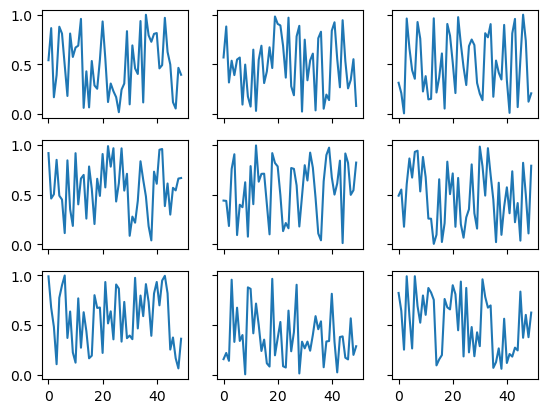

In [14]:
def _profile(ax_tmp = None, x = None, y = None):
    ax_tmp.plot(x, y)
    # return the Artist created
    return 


def profile_matrix(n, m):
    fig, ax_array = plt.subplots(n, m, sharex=True, sharey=True)
    for ax in np.ravel(ax_array):
        _profile(ax_tmp = ax, x = np.arange(50), y = np.random.rand(50))
    plt.show()
    plt.close()

profile_matrix(3, 3)

In [5]:

profile_matrix(3, 3)


In [3]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 3,
                                          n_samples_by_subject = 200,
                                          model = 'ddm',
                                          conditions = {'c_one': ['high', 'low'], 'c_two': ['high', 'low']}, #, 'c_three': ['low', 'medium', 'high']},
                                          depends_on = {'v': ['c_one', 'c_two']}, # 'theta': ['c_two']}, # 'theta': ['c_two']}, #regression_models = None, #
                                          regression_models = ['t ~ 1 + covariate_name'], #regression_covariates = None, 
                                          regression_covariates = {'covariate_name': {'type': 'categorical', 'range': (0, 1)}}, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                          group_only_regressors = True,
                                          group_only = ['z'])
                                          #fixed_at_default = ['z'])

Conditions created...
  c_one c_two
0  high  high
1   low  high
2  high   low
3   low   low
passed
depends_tmp
v
btb
6.0
0.6734494042698171


In [4]:
data

rt  response  covariate_name c_one c_two         v         a  \
0     1.966446       0.0             1.0  high  high -2.359593  2.208968   
1     1.447440       0.0             1.0  high  high -2.359593  2.208968   
2     1.149264       0.0             0.0  high  high -2.359593  2.208968   
3     1.407261       0.0             0.0  high  high -2.359593  2.208968   
4     1.475260       0.0             0.0  high  high -2.359593  2.208968   
...        ...       ...             ...   ...   ...       ...       ...   
2395  1.637109       1.0             1.0   low   low  1.994166  2.034401   
2396  1.658108       1.0             1.0   low   low  1.994166  2.034401   
2397  2.052946       1.0             0.0   low   low  1.994166  2.034401   
2398  1.338933       1.0             0.0   low   low  1.994166  2.034401   
2399  1.138115       1.0             1.0   low   low  1.994166  2.034401   

             z         t  
0     0.471946  0.749445  
1     0.471946  0.749445  
2     0.471946  0.695267  
3     0.471946  0.695267  
4     0.471946  0.695267  
...        ...       ...  
2395  0.471946  0.741117  
2396  0.471946  0.741117  
2397  0.471946  0.686938  
2398  0.471946  0.686938  
2399  0.471946  0.741117  

[2400 rows x 9 columns]

In [19]:
data.groupby(['subj_idx', 'c_one']).size().reset_index().drop(labels = [0], axis = 1)

subj_idx c_one
0        0  high
1        0   low
2        1  high
3        1   low
4        2  high
5        2   low

In [13]:
hddm_model = hddm.HDDMRegressor(data, #model = 'ddm',
                                include = ['z'], #hddm.simulators.model_config['angle']['hddm_include'],
                                informative = False, # include = hddm.simulators.model_config[model]['hddm_include'],
                                group_only_regressors = True,
                                p_outlier = 0.00,
                                is_group_model = True,
                                models = ['t ~ 1 + covariate_name'],
                                depends_on = {'v': ['c_one', 'c_two']},
                                group_only_nodes = ['z'])

Adding these covariates:
['t_Intercept', 't_covariate_name']
Now adding the HDDMBase include:
Include from inside HDDMBase:  {'a', 't', 'v'}
passed through invlog node generation with deterministic invlogit
printing knodes
OrderedDict([('a', a), ('a_std', a_std), ('a_tau', a_tau), ('a_bottom', a_subj), ('v', v), ('v_std', v_std), ('v_tau', v_tau), ('v_bottom', v_subj), ('z_trans', z_trans), ('z_bottom', z), ('t_Intercept', t_Intercept), ('t_Intercept_std', t_Intercept_std), ('t_Intercept_tau', t_Intercept_tau), ('t_Intercept_subj_reg', t_Intercept_subj), ('t_covariate_name_subj_reg', t_covariate_name), ('t_bottom', t_reg)])
passed the _create function
a_subj.0
a_subj.1
a_subj.2
v_subj(high.high).0
v_subj(high.high).1
v_subj(high.high).2
v_subj(high.low).0
v_subj(high.low).1
v_subj(high.low).2
v_subj(low.high).0
v_subj(low.high).1
v_subj(low.high).2
v_subj(low.low).0
v_subj(low.low).1
v_subj(low.low).2
t_Intercept_subj.0
t_Intercept_subj.1
t_Intercept_subj.2
t_reg.0
t_reg.1
t_reg.2
wfpt

In [3]:
hddm_simple = hddm.HDDM(data,
                        include = ['z'],
                        informative = False,
                        p_outlier = 0,
                        is_group_model = True,
                        depends_on = {'v': ['c_one', 'c_two']},
                        group_only_nodes = ['z'])

Now adding the HDDMBase include:
Include from inside HDDMBase:  {'t', 'v', 'a'}
passed through invlog node generation with deterministic invlogit
printing knodes
OrderedDict([('a', a), ('a_std', a_std), ('a_tau', a_tau), ('a_bottom', a_subj), ('v', v), ('v_std', v_std), ('v_tau', v_tau), ('v_bottom', v_subj), ('t', t), ('t_std', t_std), ('t_tau', t_tau), ('t_bottom', t_subj), ('z_trans', z_trans), ('z_bottom', z)])
passed the _create function
a_subj.0
a_subj.1
a_subj.2
v_subj(high.high).0
v_subj(high.high).1
v_subj(high.high).2
v_subj(high.low).0
v_subj(high.low).1
v_subj(high.low).2
v_subj(low.high).0
v_subj(low.high).1
v_subj(low.high).2
v_subj(low.low).0
v_subj(low.low).1
v_subj(low.low).2
t_subj.0
t_subj.1
t_subj.2
wfpt(high.high).0
wfpt(high.high).1
wfpt(high.high).2
wfpt(high.low).0
wfpt(high.low).1
wfpt(high.low).2
wfpt(low.high).0
wfpt(low.high).1
wfpt(low.high).2
wfpt(low.low).0
wfpt(low.low).1
wfpt(low.low).2
Is Neural Net?  False


In [3]:
# Make HDDM Model 
hddmnn_model = hddm.HDDMnnRegressor(data,
                                    model = 'ddm',
                                    include = ['z'], #hddm.simulators.model_config['angle']['hddm_include'],
                                    informative = False, # include = hddm.simulators.model_config[model]['hddm_include'],
                                    group_only_regressors = True,
                                    p_outlier = 0.05,
                                    is_group_model = True,
                                    models = ['t ~ 1 + covariate_name'],
                                    depends_on = {'v': ['c_one', 'c_two'], 'theta': ['c_two']},
                                    group_only_nodes = ['z'])

# Group only nodes --> does not apply to regressors !
                                    #, 'z ~ condition_one']) # depends_on = {'a': 'condition_one', 't': ['condition_three', 'condition_one']})

outcomes:  t
Adding these covariates:
['t_Intercept', 't_covariate_name']
Now adding the HDDMBase include:
Include from inside HDDMBase:  {'a', 't', 'v'}
Recognized HDDMnn
RT
0.62783957
4.9658737
Response
[-1.  1.]
Printing reg outcome:
{'t'}
{'a', 'v', 'z'}
printing include: 
{'a', 'v', 'z'}
passed through invlog node generation with deterministic invlogit
knodes
OrderedDict([('a', a), ('a_std', a_std), ('a_tau', a_tau), ('a_bottom', a_subj), ('v', v), ('v_std', v_std), ('v_tau', v_tau), ('v_bottom', v_subj), ('z_trans', z_trans), ('z_bottom', z)])
knodes
OrderedDict([('a', a), ('a_std', a_std), ('a_tau', a_tau), ('a_bottom', a_subj), ('v', v), ('v_std', v_std), ('v_tau', v_tau), ('v_bottom', v_subj), ('z_trans', z_trans), ('z_bottom', z)])
reg:  {'outcome': 't', 'model': ' 1 + covariate_name', 'params': ['t_Intercept', 't_covariate_name'], 'link_func': <function HDDMnnRegressor.__init__.<locals>.<lambda> at 0x1941444c20>}
param_lookup passed to _create stochastic_knodes
t
['t']
print

In [4]:
hddmnn_model.sample(100, burn = 50)

NameError: name 'hddmnn_model' is not defined

In [14]:
hddm_model.sample(100, burn = 50)

t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
float64
sv
<class 'float'>
a
float64
z
<class 'numpy.float64'>
sz
<class 'float'>
t
float64
st
<class 'float'>
t
float64
v
floa

In [4]:
hddm_simple.sample(100, burn = 50)

 [-----------------100%-----------------] 100 of 100 complete in 15.4 sec

In [7]:
hddm_simple.data['response'][hddm_simple['response'] == 0] = -1.0

KeyError: 'response'

In [16]:
hddm_simple.data.loc[ hddm_simple.data['response'] == 0, 'response'] = -1

In [18]:
hddm_simple.

n_plots
4
rows
1
columns
1
tmp_samples

[-0.75549363  0.48505635  0.38380448  1.19085871]
tmp_samples

[-0.6861965   0.43304179  0.39729252  1.19116335]
tmp_samples

[-0.63087626  0.42899822  0.38924285  1.19586917]
tmp_samples

[-0.57040004  0.41536507  0.39391097  1.19437534]
tmp_samples

[-0.6776057   0.44996478  0.38550653  1.19191009]
tmp_samples

[-0.82350414  0.42810554  0.41167579  1.19153678]
tmp_samples

[-0.46785456  0.47849324  0.38868683  1.19014397]
tmp_samples

[-0.3947986   0.47277319  0.39085674  1.19072488]
tmp_samples

[-1.06587524  0.46721223  0.41167579  1.19018998]
tmp_samples

[-0.5734671   0.47747438  0.39674588  1.18996917]
tmp_samples

[-0.55921986  0.42647621  0.3960067   1.19205175]
tmp_samples

[-0.68840356  0.47202442  0.39428795  1.19033047]
tmp_samples

[-0.86480743  0.42871139  0.39428795  1.19433014]
tmp_samples

[-0.84667497  0.43325645  0.41167579  1.19416028]
tmp_samples

[-0.369731    0.47759532  0.39465702  1.19052325]
tmp_samples

[-0.91414959  0

<Figure size 640x480 with 0 Axes>

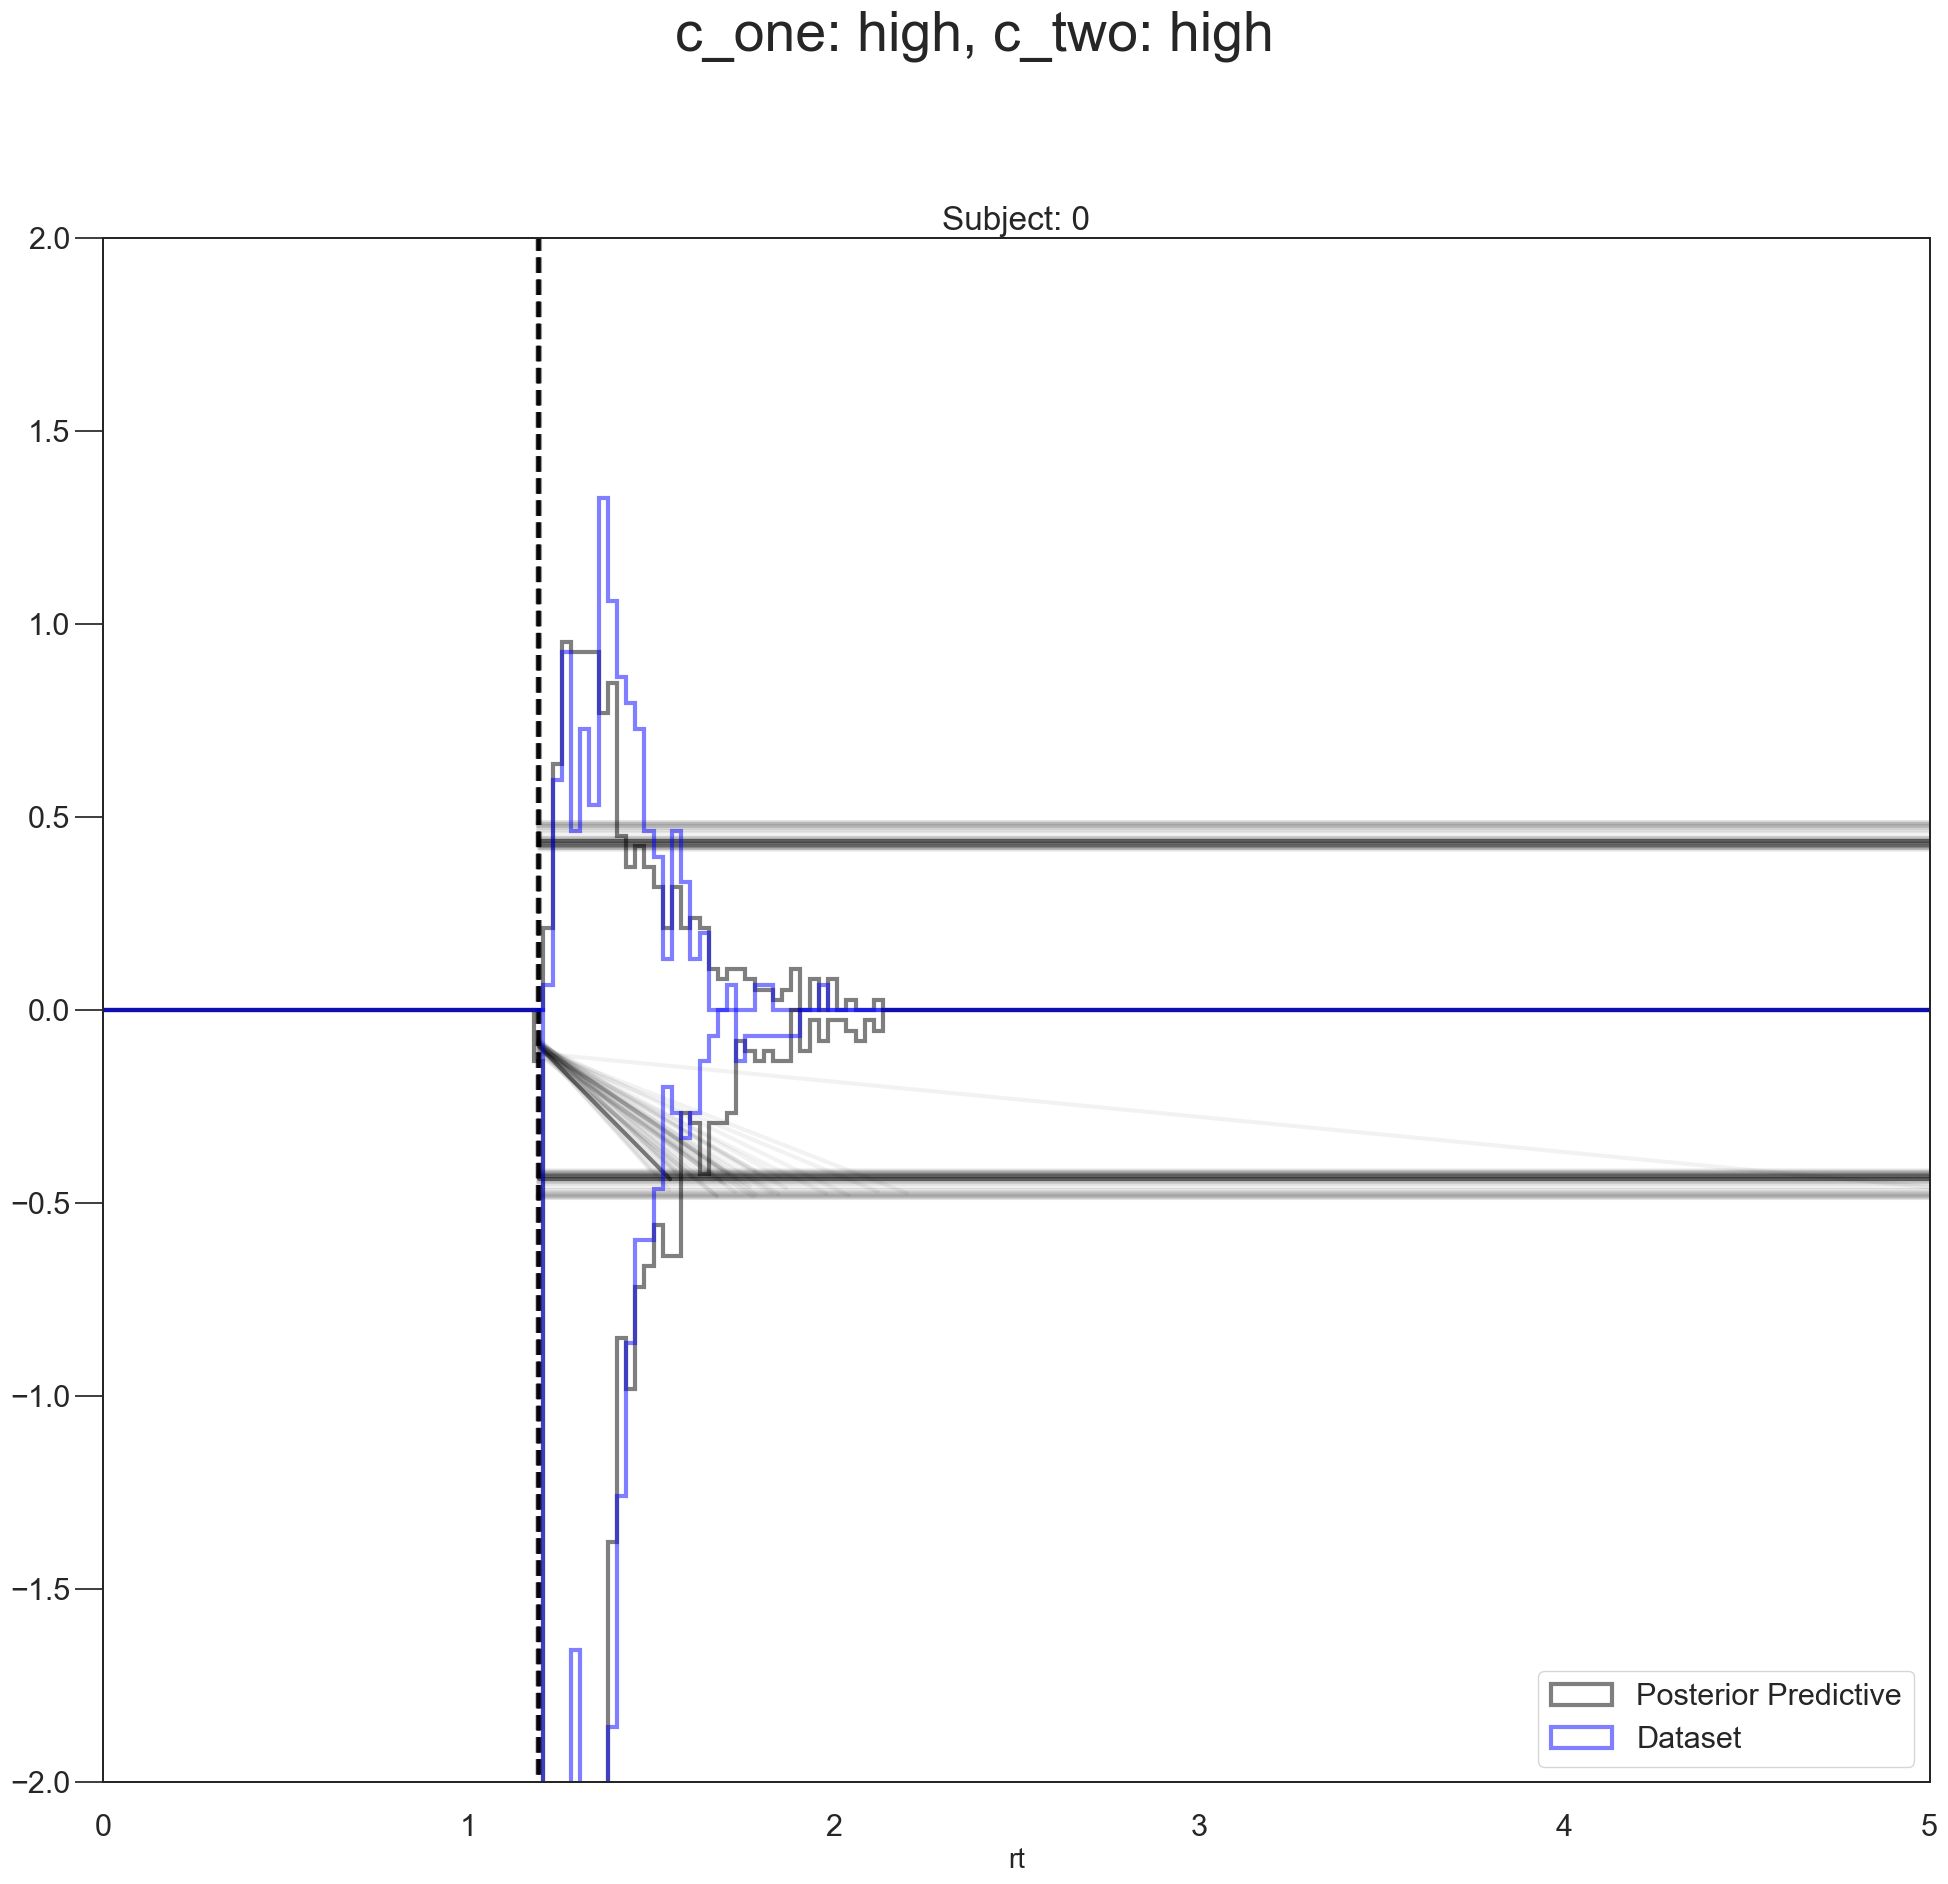

rows
1
columns
1
tmp_samples

[-2.02736177  0.41936381  0.3974069   1.19319779]
tmp_samples

[-1.97781527  0.42647621  0.3960067   1.19205175]
tmp_samples

[-1.74191928  0.4764765   0.39212185  1.190627  ]
tmp_samples

[-1.95961488  0.44736721  0.39827636  1.18919875]
tmp_samples

[-1.80384868  0.42502491  0.39212185  1.19392084]
tmp_samples

[-1.95422853  0.44753302  0.40186941  1.19156814]
tmp_samples

[-1.98843311  0.44468025  0.38980378  1.19204765]
tmp_samples

[-1.74667068  0.4252566   0.38321424  1.19495756]
tmp_samples

[-1.89568692  0.4193947   0.38460885  1.19659106]
tmp_samples

[-1.91135853  0.47944796  0.3974069   1.19004127]
tmp_samples

[-1.96511669  0.42743793  0.39455895  1.19263638]
tmp_samples

[-2.18258638  0.42474242  0.3987932   1.19419305]
tmp_samples

[-2.13829129  0.43655221  0.39906745  1.19185793]
tmp_samples

[-2.17313043  0.42420236  0.39215267  1.19566737]
tmp_samples

[-1.94726837  0.42581987  0.38552543  1.19598616]
tmp_samples

[-1.93774622  0.4261028  

<Figure size 640x480 with 0 Axes>

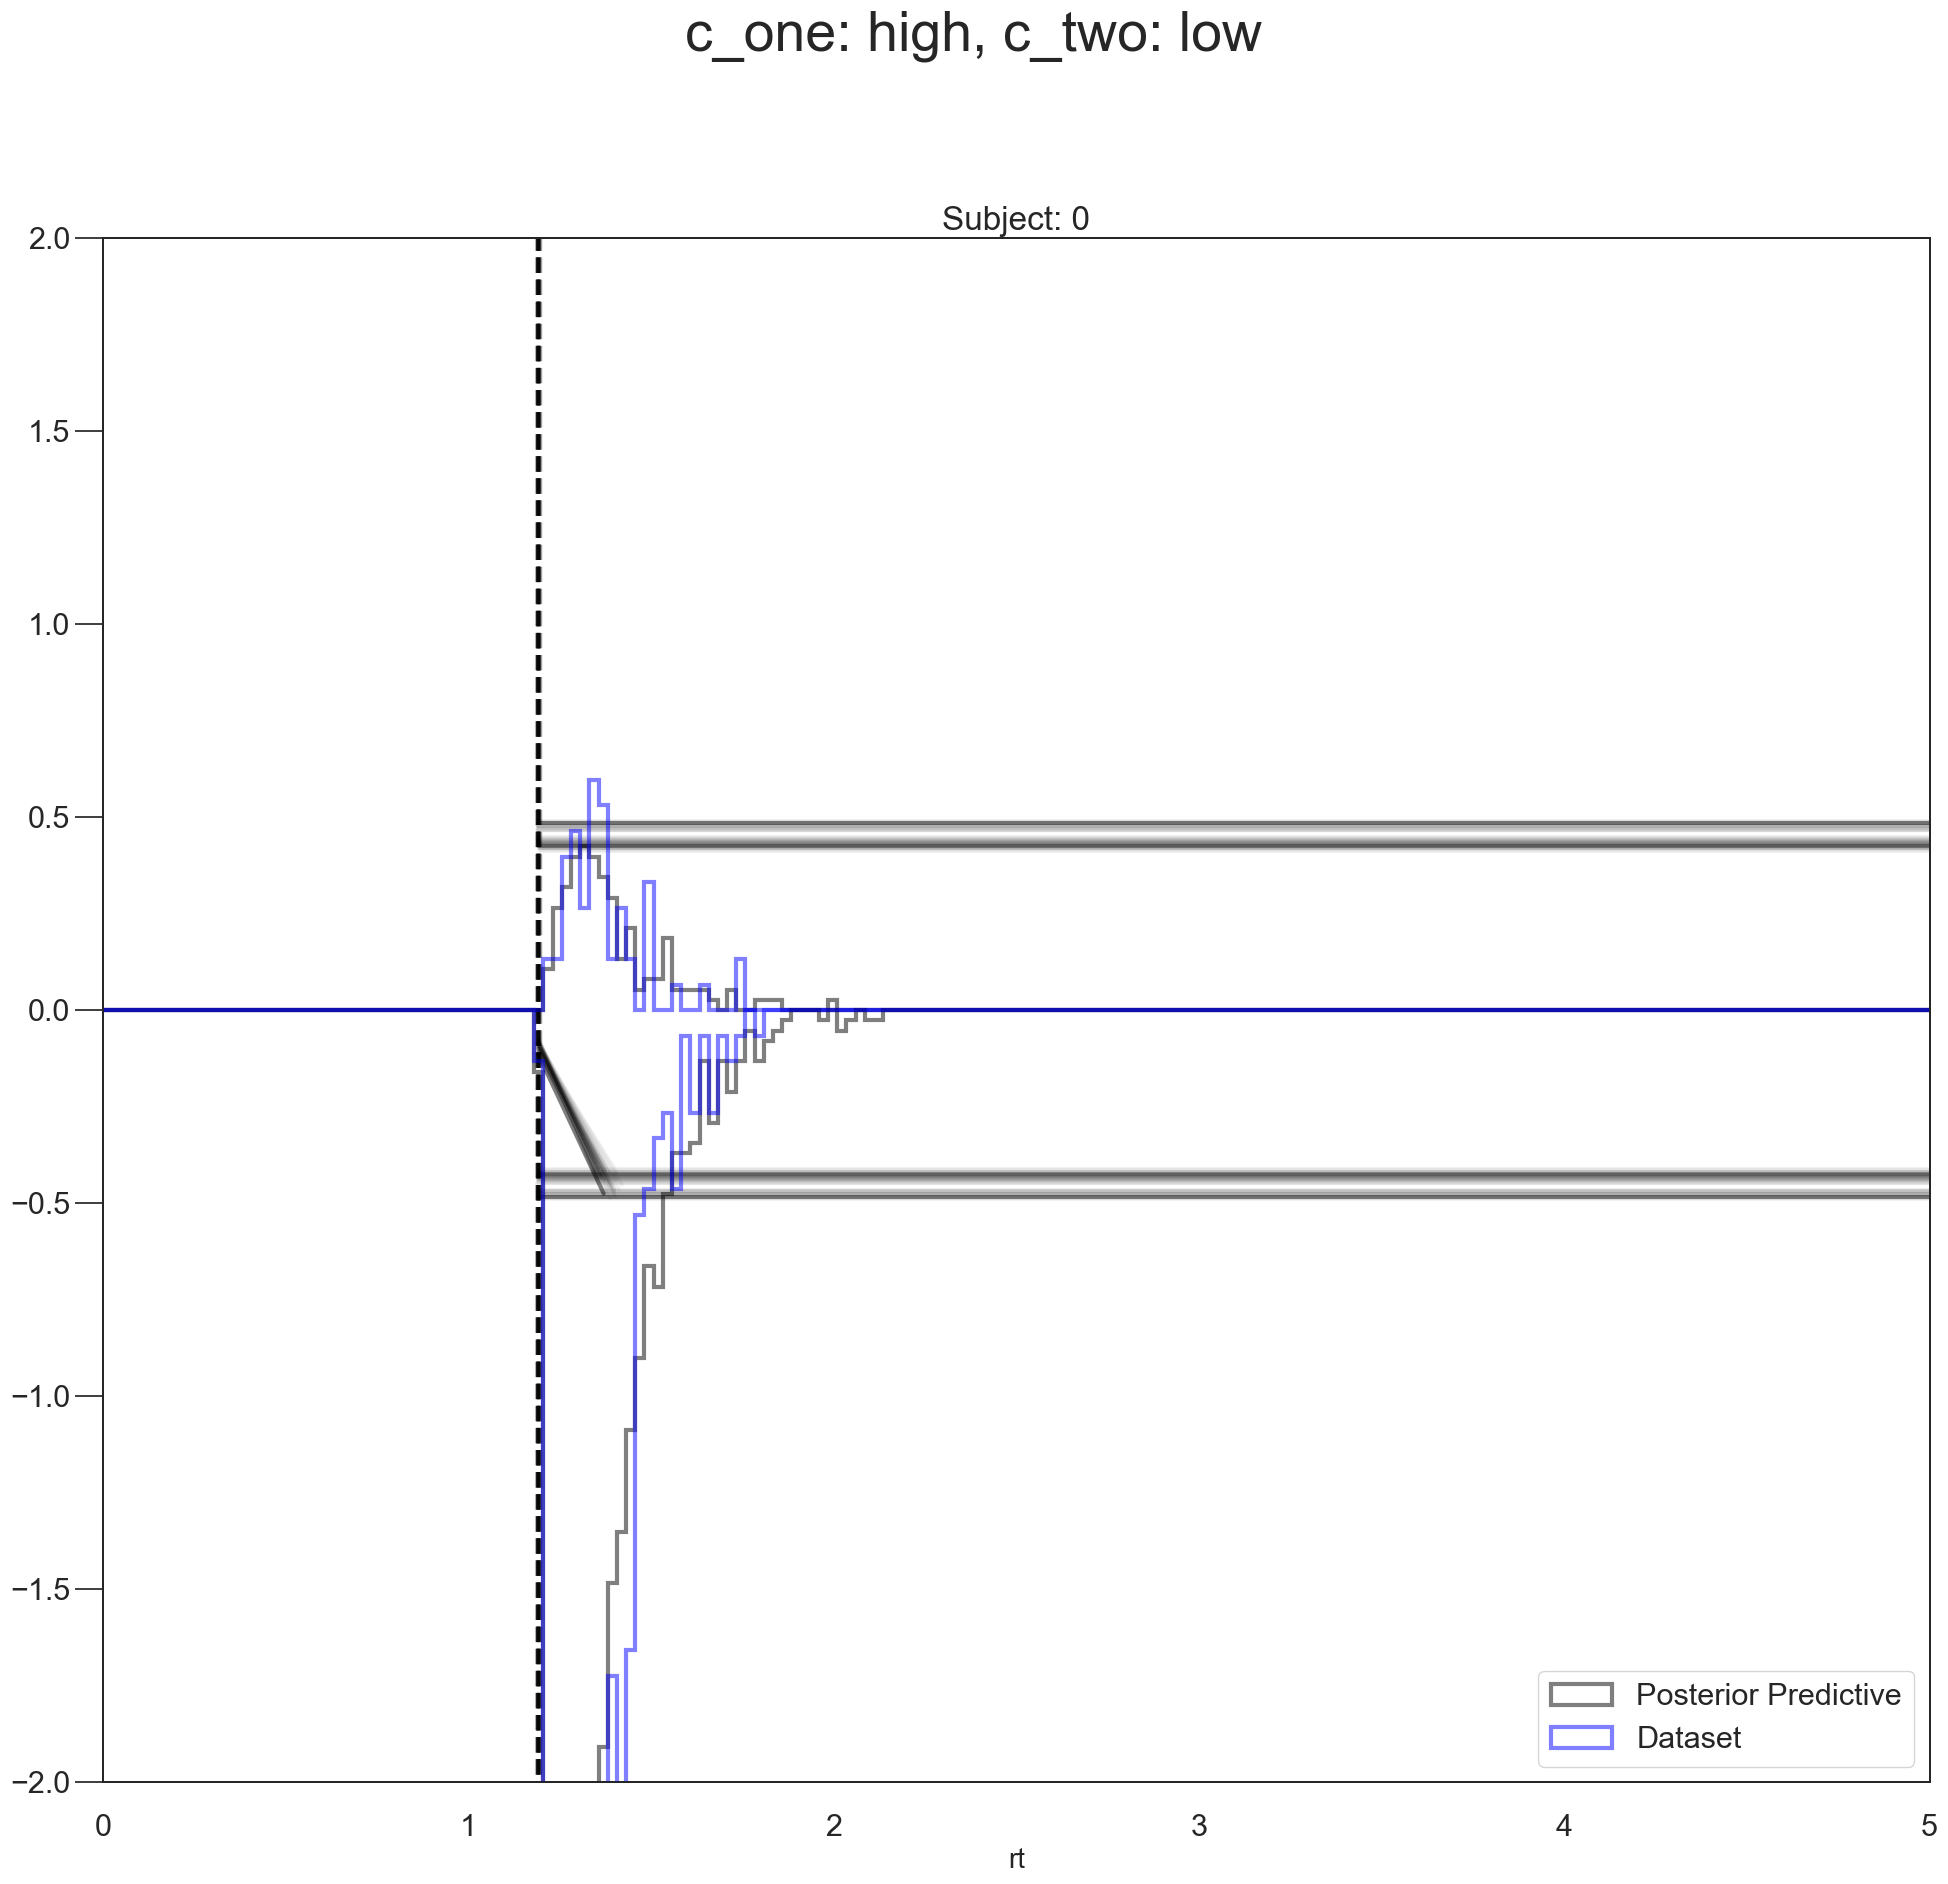

rows
1
columns
1
tmp_samples

[0.54248963 0.43728914 0.41271999 1.19135345]
tmp_samples

[0.81211832 0.42156066 0.38552543 1.19682205]
tmp_samples

[0.58053689 0.4195293  0.41271999 1.19205127]
tmp_samples

[0.40391153 0.41373576 0.38579984 1.19500149]
tmp_samples

[0.34050753 0.44716804 0.38944177 1.19276503]
tmp_samples

[0.49571564 0.43165724 0.39215267 1.19305807]
tmp_samples

[0.87788315 0.43587879 0.39596449 1.1912586 ]
tmp_samples

[0.72124661 0.47506059 0.37701885 1.19119575]
tmp_samples

[0.64868573 0.4285325  0.39729252 1.19408815]
tmp_samples

[0.77028824 0.4252566  0.38321424 1.19495756]
tmp_samples

[0.47831557 0.4423987  0.41161558 1.19069604]
tmp_samples

[0.48986602 0.4820388  0.39596449 1.19132094]
tmp_samples

[1.01805158 0.43520744 0.41161558 1.19381748]
tmp_samples

[0.91997791 0.42089334 0.39514174 1.19423622]
tmp_samples

[1.03559513 0.42549477 0.40194942 1.19501442]
tmp_samples

[0.46493757 0.47759532 0.39465702 1.19052325]
tmp_samples

[1.00328185 0.42372436 0.3

<Figure size 640x480 with 0 Axes>

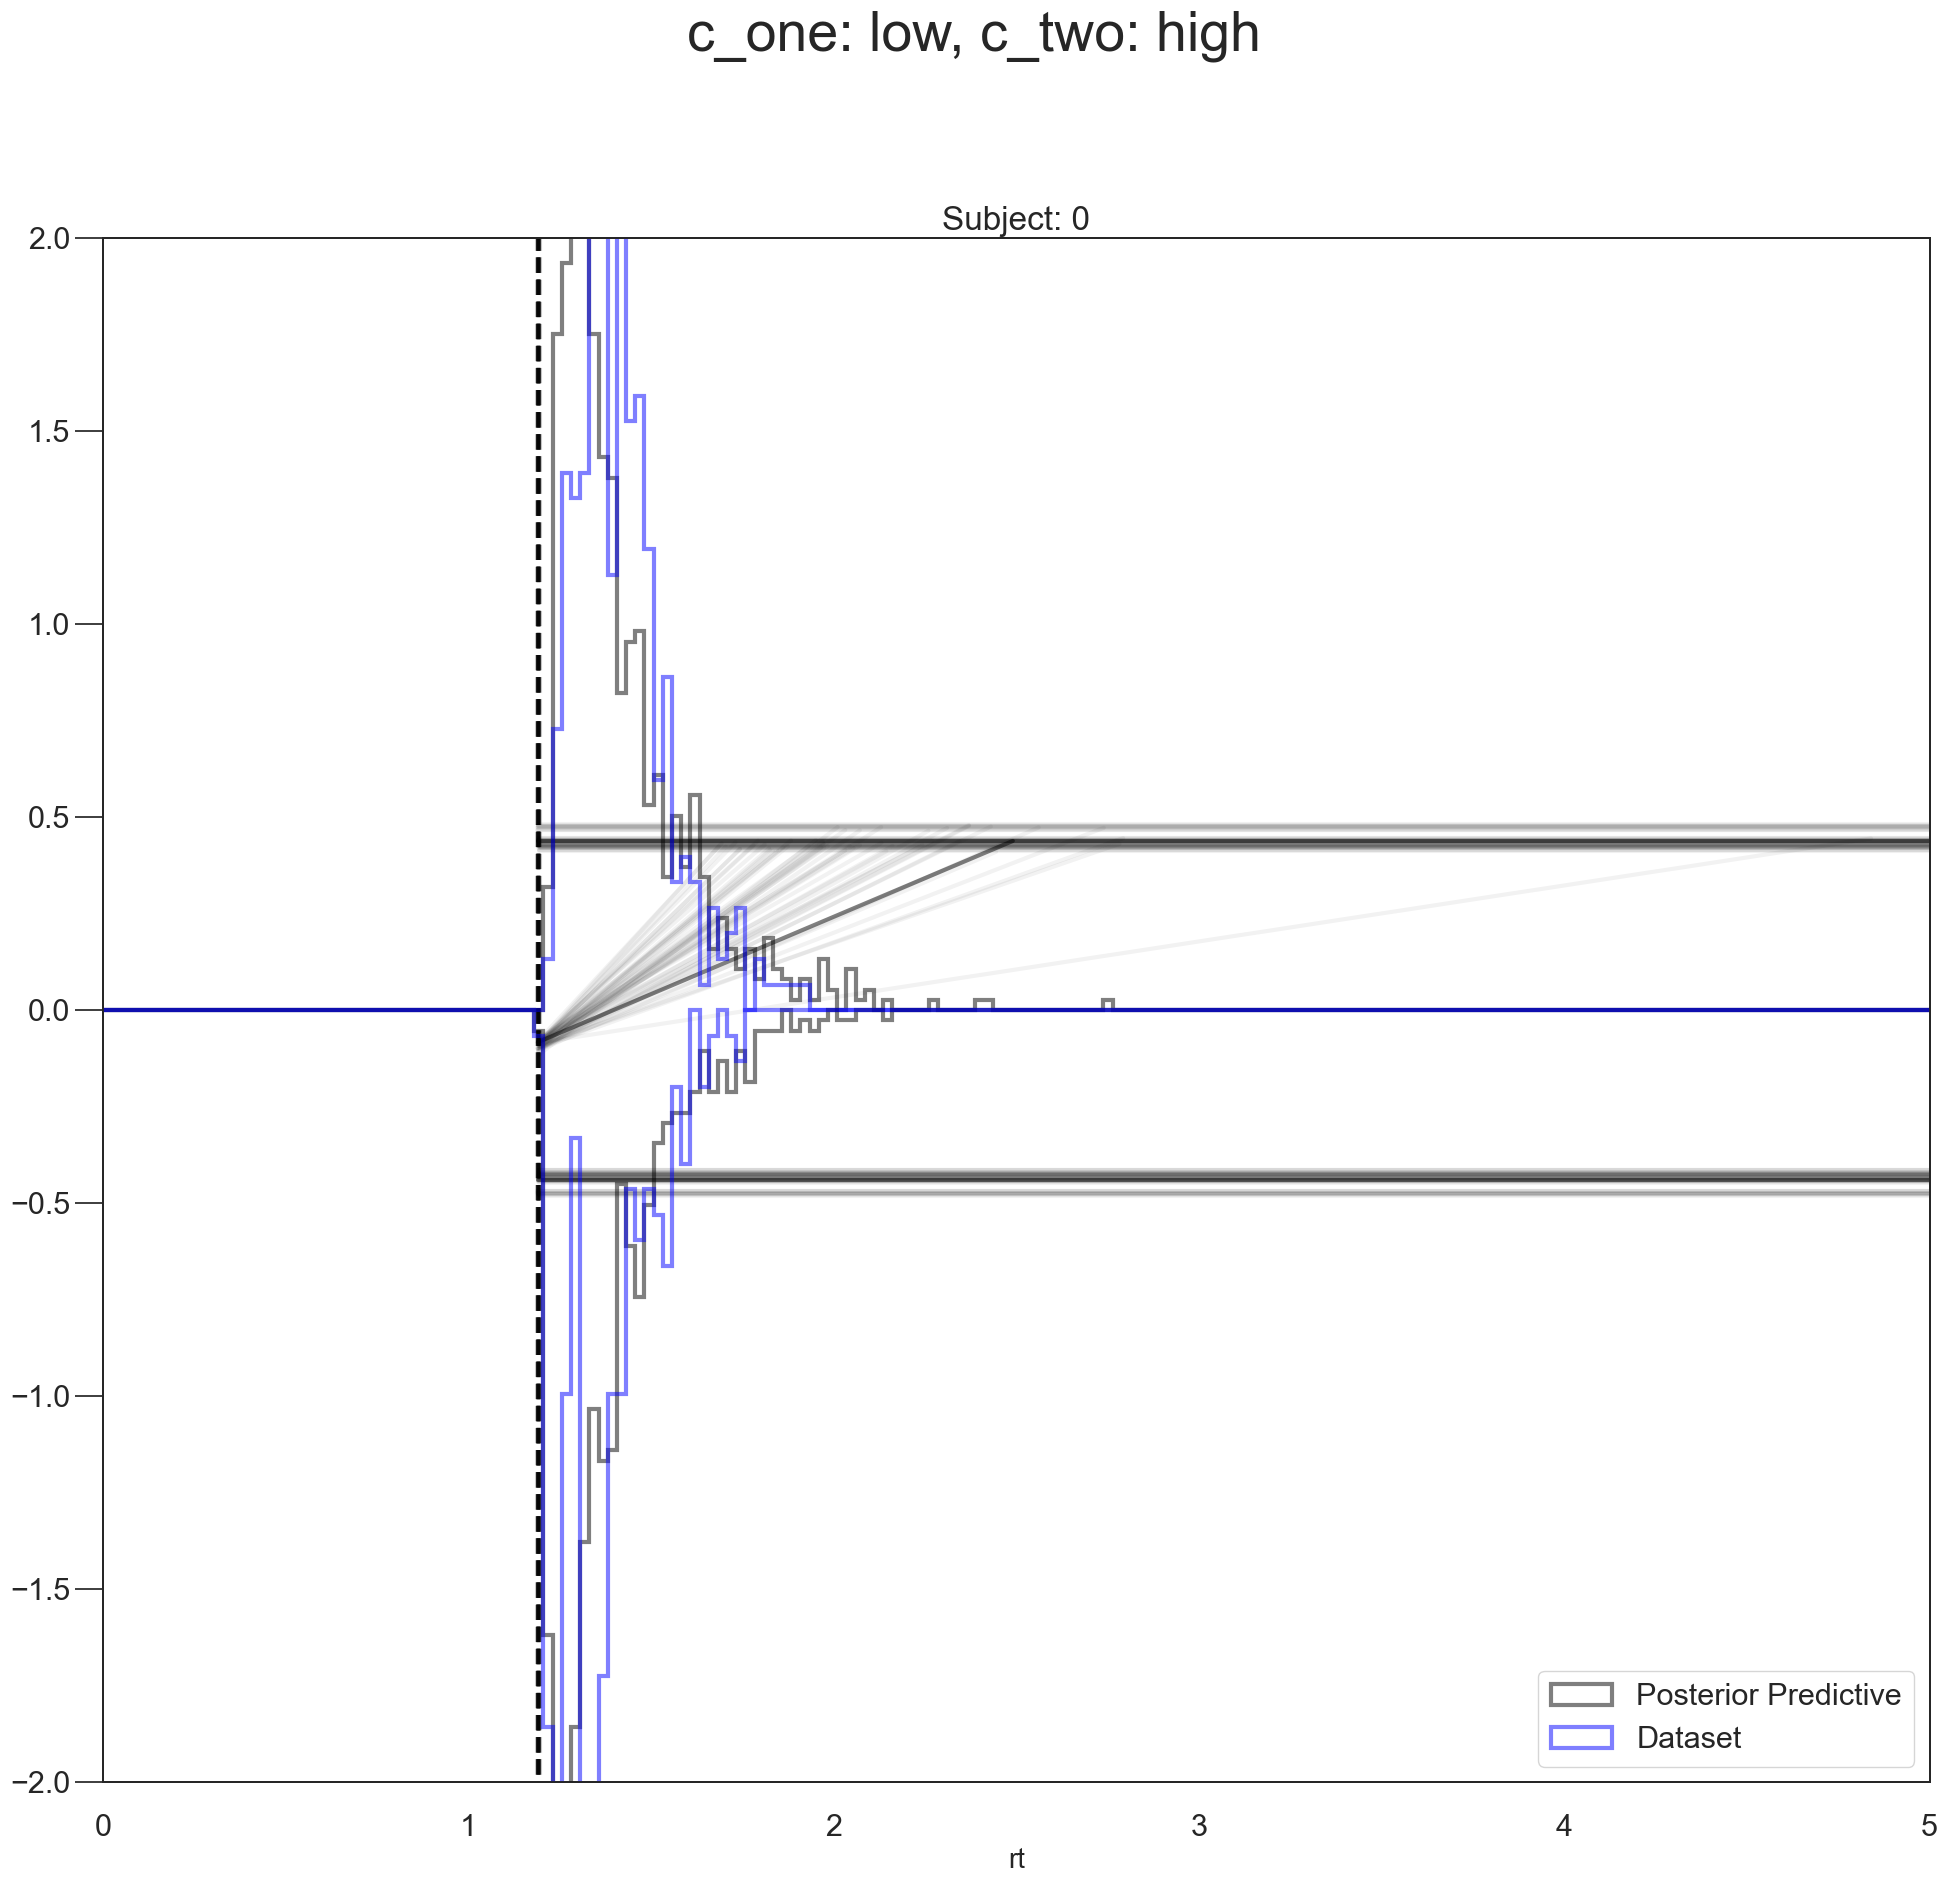

rows
1
columns
1
tmp_samples

[-0.3746064   0.43505143  0.38868683  1.19220351]
tmp_samples

[0.58700264 0.4764765  0.39212185 1.190627  ]
tmp_samples

[-0.64102386  0.43776974  0.39455895  1.19321638]
tmp_samples

[-0.31003888  0.42825261  0.39642428  1.19169947]
tmp_samples

[1.1218266  0.48404971 0.39215267 1.19048791]
tmp_samples

[0.81254031 0.46019057 0.3960067  1.18997345]
tmp_samples

[-0.3494811   0.43980375  0.38924285  1.19348523]
tmp_samples

[-0.33090854  0.42628713  0.3875083   1.1937965 ]
tmp_samples

[0.29785343 0.46714581 0.40283248 1.19032535]
tmp_samples

[0.4602922  0.47202442 0.39428795 1.19033047]
tmp_samples

[0.48827049 0.46778363 0.40040564 1.19209932]
tmp_samples

[-0.05292829  0.43587879  0.39596449  1.1912586 ]
tmp_samples

[-0.25321729  0.42705395  0.38868683  1.19472604]
tmp_samples

[-0.39233431  0.4394077   0.4057102   1.19075352]
tmp_samples

[0.48030675 0.46208437 0.41161558 1.19140965]
tmp_samples

[-0.44180854  0.44996478  0.38550653  1.19191009]
tmp

<Figure size 640x480 with 0 Axes>

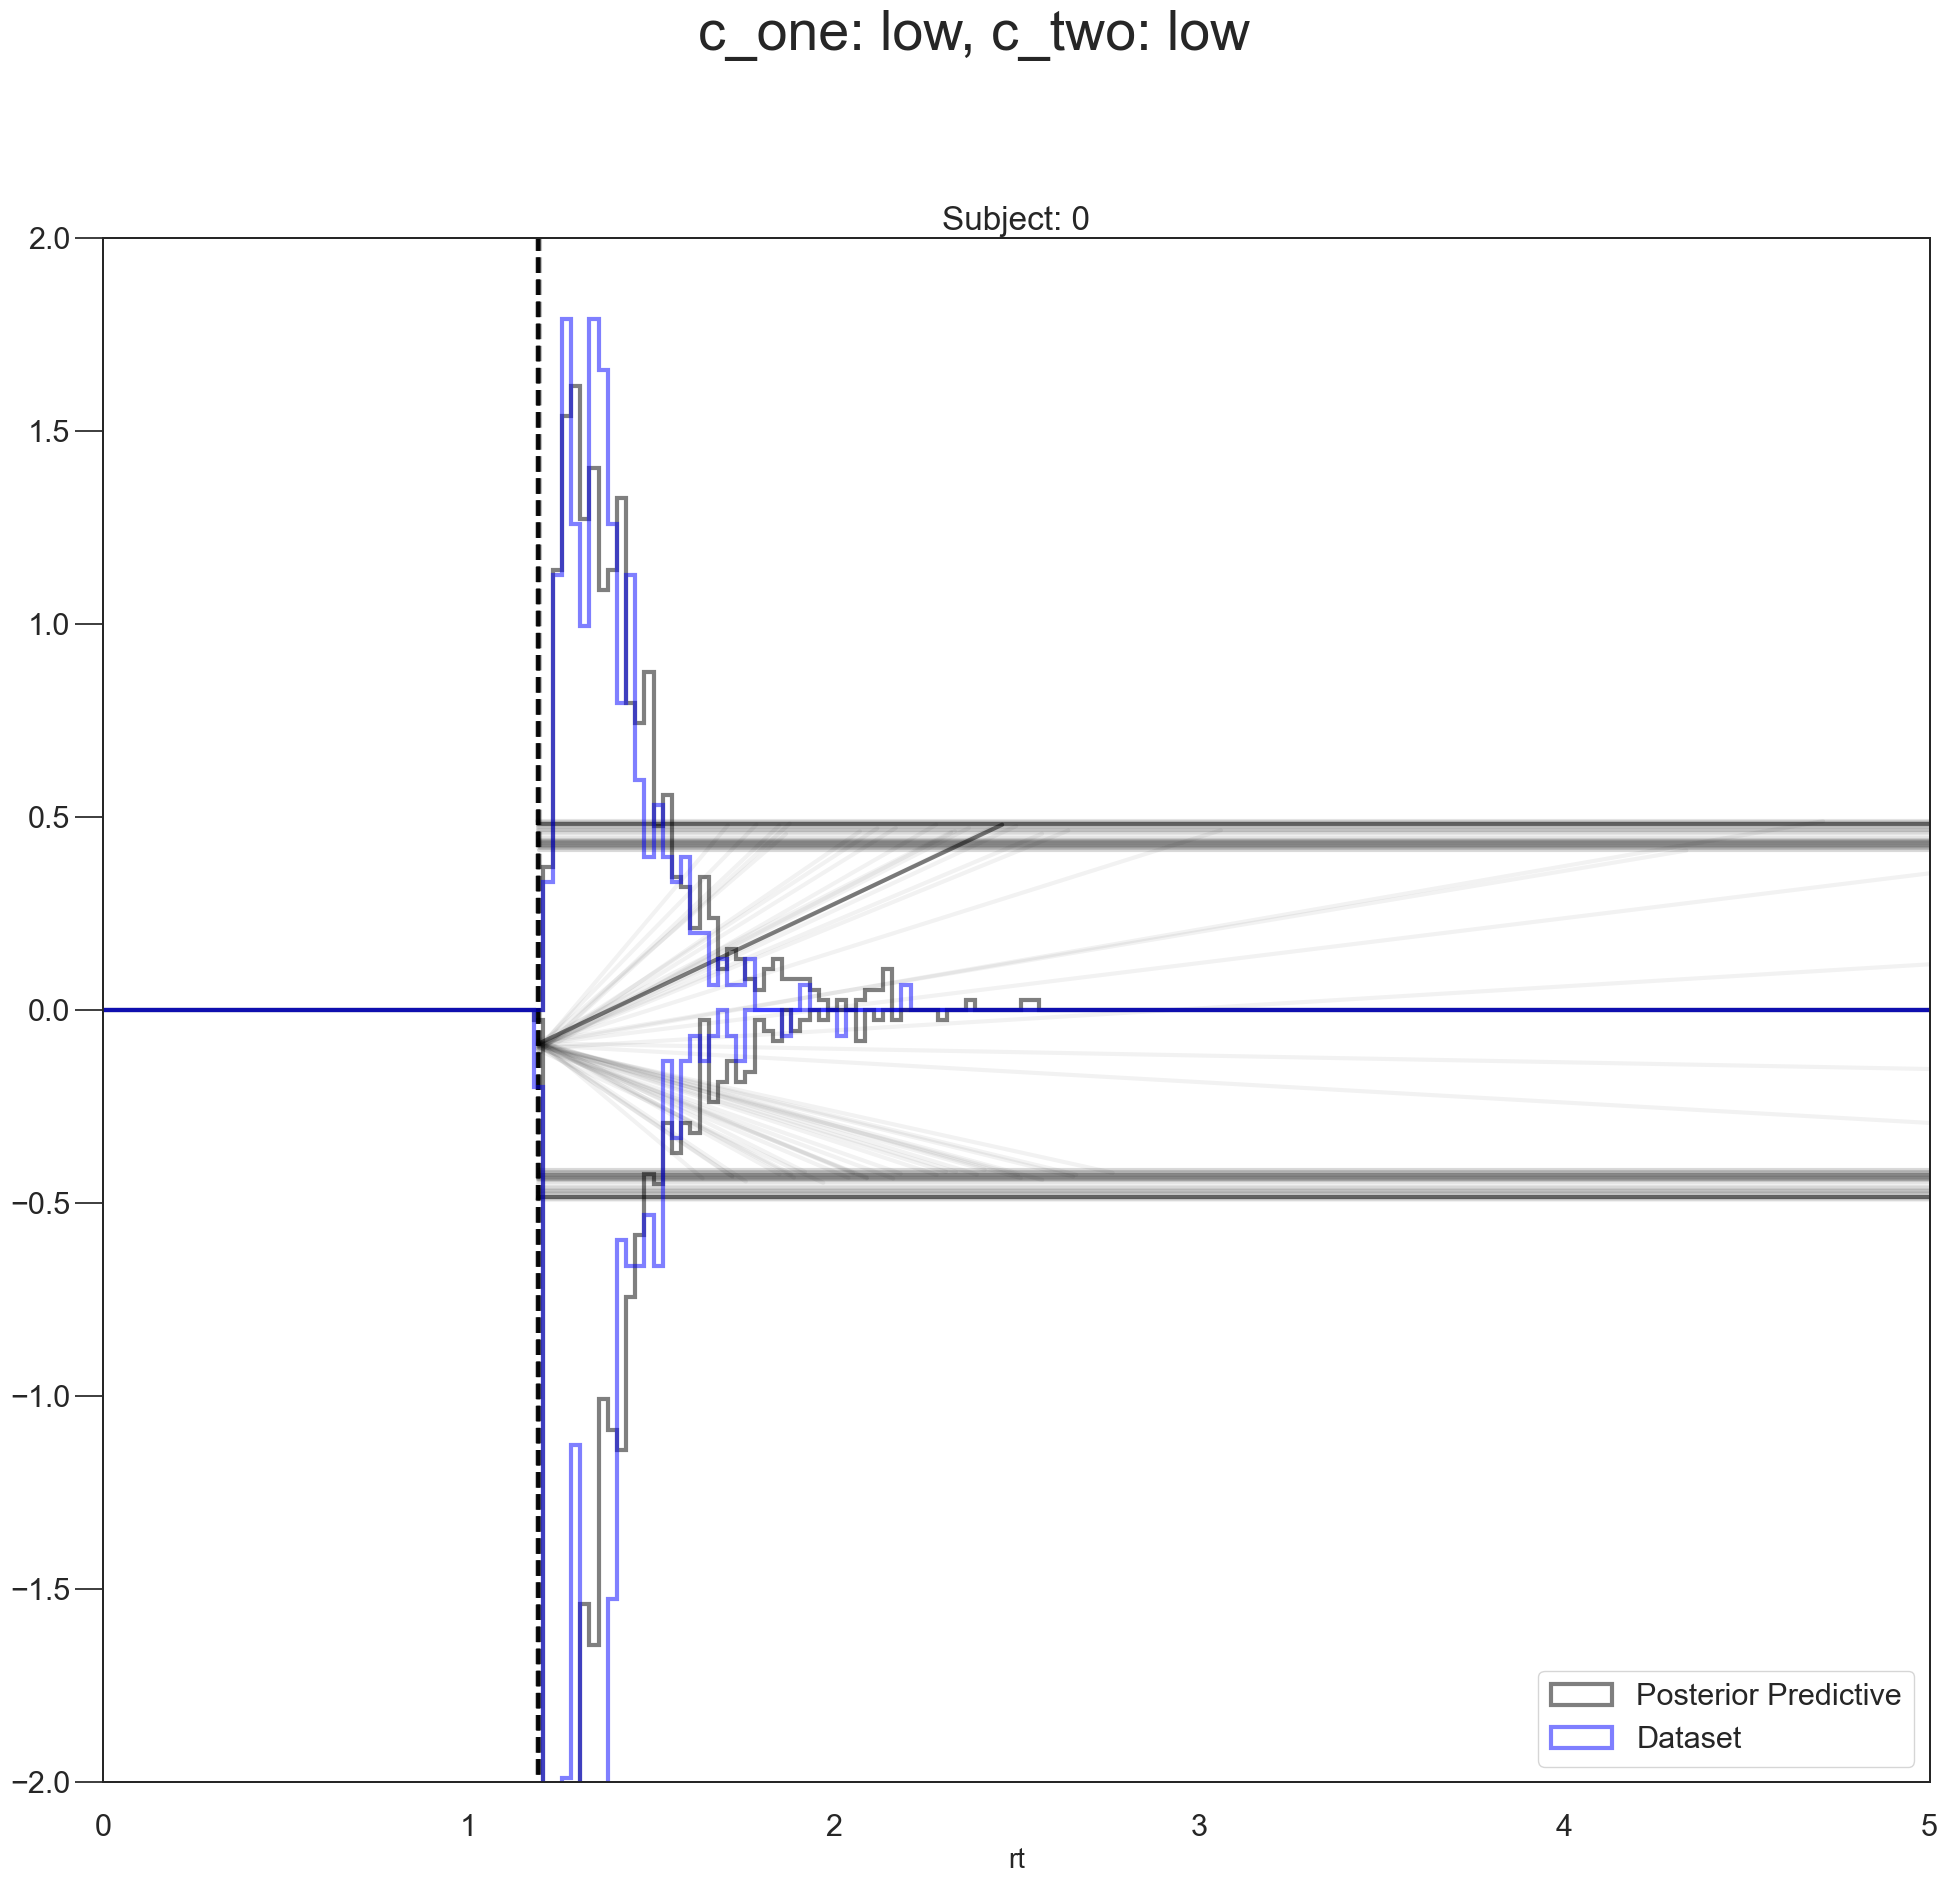

In [5]:
hddm.graphs.model_plot(hddm_model = hddm_simple,
                       model_ground_truth = 'ddm',
                       grouped = True,
                       n_posterior_parameters = 50,
                       n_simulations_per_parameter = 30)

In [7]:
my_pd = pd.DataFrame(np.random.uniform(size = (100,3)), columns = ['a', 'b', 'c'])

In [8]:
my_pd = np.random.uniform(size = (100, 3))

In [24]:
my_pd[(my_pd[:, 1] > 0.3) + (my_pd[:, 1] < 0.1), :]

array([[0.21719383, 0.74191676, 0.83291059],
       [0.57110422, 0.97141273, 0.74366707],
       [0.34288602, 0.60173099, 0.73615694],
       [0.77244345, 0.74552261, 0.30195477],
       [0.44635344, 0.92151538, 0.68728828],
       [0.05045145, 0.43413874, 0.49107826],
       [0.38903014, 0.90330631, 0.03391743],
       [0.33818314, 0.99931879, 0.02966781],
       [0.25787448, 0.48549444, 0.98649757],
       [0.1281496 , 0.46135952, 0.43388531],
       [0.23917893, 0.4547319 , 0.14879583],
       [0.95495011, 0.72092876, 0.13707452],
       [0.36299251, 0.32236989, 0.28817151],
       [0.48817825, 0.43379869, 0.19834298],
       [0.90881214, 0.07322899, 0.14039364],
       [0.12751707, 0.97698028, 0.02521713],
       [0.21056536, 0.74129889, 0.47003946],
       [0.44745361, 0.61809808, 0.79563798],
       [0.08100073, 0.80282392, 0.65836545],
       [0.22503602, 0.34714102, 0.63920921],
       [0.62954313, 0.6626694 , 0.792664  ],
       [0.83938834, 0.74822082, 0.03110354],
       [0.

In [14]:
my_pd[:, 1] > 0.3 

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True])

In [23]:
(my_pd[:, 1] > 0.3) + (my_pd[:, 1] < 0.1)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True])

In [20]:
hddmnn_model.mc.trace('v_subj(high.high).0')[:]

array([-1.48719555, -1.49551407, -1.42318954, -1.42666516, -1.44741373,
       -1.44578915, -1.40830481, -1.35415985, -1.23256869, -1.28773766,
       -1.47511011, -1.36104076, -1.32597729, -1.40959642, -1.43445855,
       -1.37012667, -1.33803962, -1.32592524, -1.35604048, -1.41363806,
       -1.33823773, -1.34828144, -1.35889994, -1.33809141, -1.42493174,
       -1.37010858, -1.36589151, -1.3417752 , -1.44194991, -1.54058091,
       -1.53865193, -1.48066977, -1.44926376, -1.37981827, -1.41719805,
       -1.43447372, -1.42334334, -1.2860658 , -1.33207534, -1.31381828,
       -1.4334166 , -1.40447655, -1.38562494, -1.48456701, -1.43815085,
       -1.34242564, -1.37617677, -1.40213104, -1.54311187, -1.51461514])

In [22]:
hddmnn_model.mc.trace()

TypeError: trace() missing 1 required positional argument: 'name'

In [16]:
dir(hddmnn_model.mc.tally())

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/pymc/database/base.py:282: UserWarning: 
Error tallying deviance, will not try to tally it again this chain.
Did you make all the samevariables and step methods tallyable
as were tallyable last time you used the database file?

Error:

Traceback (most recent call last):
  File "/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/pymc/database/ram.py", line 97, in tally
    self._trace[chain][self._index[chain]] = value.copy()
AttributeError: 'float' object has no attribute 'copy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/pymc/database/base.py", line 272, in tally
    self._traces[name].tally(chain)
  File "/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/pymc/database/ram.py", line 99, in tally
    se

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [46]:
hddmnn_model.mc.variables

{<pymc.distributions.new_dist_class.<locals>.new_class 'a' at 0x105c97310>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'a_std' at 0x105c99a10>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.0' at 0x19369b33d0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.1' at 0x19369b3250>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.2' at 0x19369b31d0>,
 <pymc.PyMCObjects.Deterministic 'a_tau' at 0x105cd2cd0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_Intercept' at 0x105cd6850>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_Intercept_std' at 0x193680a390>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_Intercept_subj.0' at 0x1936a1b490>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_Intercept_subj.1' at 0x1936a1b650>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_Intercept_subj.2' at 0x1936a1b8d0>,
 <pymc.PyMCObjects.Deterministic 't_Intercept_tau' at 0x19369f5ad0>,
 <pymc

In [42]:
var_obj.get_value()

array(-1.54996932)

In [45]:
for var_obj in hddmnn_model.mc.variables:
    continue

var_obj.__name__



'v(high.high)'

print k
a
print k
a_std
print k
a_subj.0
print k
a_subj.1
print k
a_subj.2
print k
v(high.high)
print k
v(high.low)
print k
v(low.high)
print k
v(low.low)
print k
v_std
print k
v_subj(high.high).0
print k
v_subj(high.high).1
print k
v_subj(high.high).2
print k
v_subj(high.low).0
print k
v_subj(high.low).1
print k
v_subj(high.low).2
print k
v_subj(low.high).0
print k
v_subj(low.high).1
print k
v_subj(low.high).2
print k
v_subj(low.low).0
print k
v_subj(low.low).1
print k
v_subj(low.low).2
print k
z
print k
t_Intercept
print k
t_Intercept_std
print k
t_Intercept_subj.0
print k
t_Intercept_subj.1
print k
t_Intercept_subj.2
print k
t_covariate_name


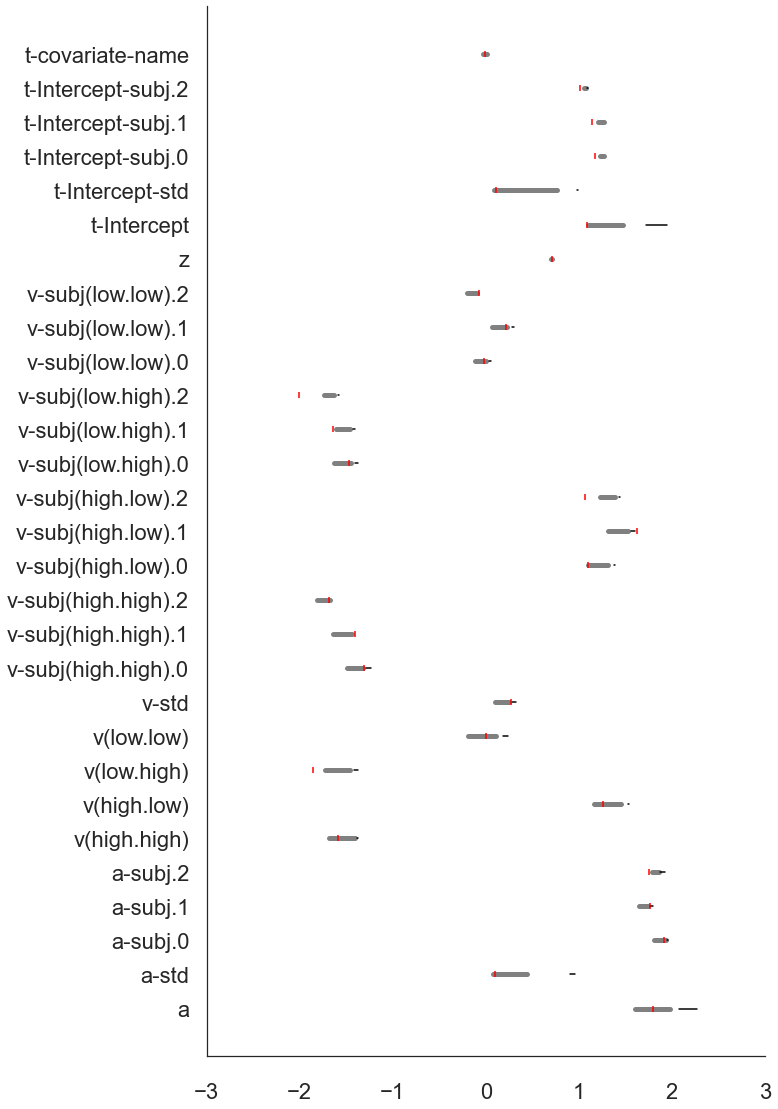

In [5]:
hddm.graphs.caterpillar_plot(hddm_model = hddmnn_model,
                             ground_truth_parameter_dict = full_parameter_dict,
                             drop_sd = False,
                             x_limits = [-3, 3])

In [10]:
x = np.zeros((100,))

In [13]:
-np.inf

-inf

In [7]:
for i in range(100):
    x = hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].random()
    print(i)

boundary shape
(20001,)
0
boundary shape
(20001,)
1
boundary shape
(20001,)
2
boundary shape
(20001,)
3
boundary shape
(20001,)
4
boundary shape
(20001,)
5
boundary shape
(20001,)
6
boundary shape
(20001,)
7
boundary shape
(20001,)
8
boundary shape
(20001,)
9
boundary shape
(20001,)
10
boundary shape
(20001,)
11
boundary shape
(20001,)
12
boundary shape
(20001,)
13
boundary shape
(20001,)
14
boundary shape
(20001,)
15
boundary shape
(20001,)
16
boundary shape
(20001,)
17
boundary shape
(20001,)
18
boundary shape
(20001,)
19
boundary shape
(20001,)
20
boundary shape
(20001,)
21
boundary shape
(20001,)
22
boundary shape
(20001,)
23
boundary shape
(20001,)
24
boundary shape
(20001,)
25
boundary shape
(20001,)
26
boundary shape
(20001,)
27
boundary shape
(20001,)
28
boundary shape
(20001,)
29
boundary shape
(20001,)
30
boundary shape
(20001,)
31
boundary shape
(20001,)
32
boundary shape
(20001,)
33
boundary shape
(20001,)
34
boundary shape
(20001,)
35
boundary shape
(20001,)
36
boundary sh

In [5]:
x = hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].pdf(np.zeros((100, 1)))

{'p_outlier': 0.05, 'w_outlier': 0.1, 'v': <pymc.distributions.new_dist_class.<locals>.new_class 'v_subj(high.high).0' at 0x19416b0710>, 'a': <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.0' at 0x19416a4f90>, 'z': <pymc.PyMCObjects.Deterministic 'z' at 0x1941618e10>, 't': <pymc.PyMCObjects.Deterministic 't_reg.0' at 0x19415f6110>, 'reg_outcomes': SetContainer({'t'})}
(100, 1)


In [9]:
x = hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents

In [18]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents

{'p_outlier': 0,
 'v': <pymc.distributions.new_dist_class.<locals>.new_class 'v_subj(high.high).0' at 0x194608c710>,
 'sv': 0.0,
 'a': <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.0' at 0x1945ff12d0>,
 'z': <pymc.PyMCObjects.Deterministic 'z' at 0x19486d1f10>,
 'sz': 0.0,
 't': <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.0' at 0x1946201fd0>,
 'st': 0.0}

In [19]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].pdf(np.arange(-1, 1, 0.1))

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
{'p_outlier': 0, 'v': <pymc.distributions.new_dist_class.<locals>.new_class 'v_subj(high.high).0' at 0x194608c710>, 'sv': 0.0, 'a': <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.0' at 0x1945ff12d0>, 'z': <pymc.PyMCObjects.Deterministic 'z' at 0x19486d1f10>, 'sz': 0.0, 't': <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.0' at 0x1946201fd0>, 'st': 0.0}


array([6.46774320e-01, 4.63547765e-01, 2.50116621e-01, 7.78926246e-02,
       6.84036760e-03, 1.06938398e-05, 1.38243404e-22, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.45357377e-20, 3.05939205e-07,
       3.46828591e-05, 1.91209057e-04, 4.12020600e-04, 5.93311369e-04])

In [5]:
hddm_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents

NameError: name 'hddm_model' is not defined

In [28]:
hddm.wfpt.pdf_array(np.arange(-1, 1, 0.1), **hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value)

array([6.46774320e-01, 4.63547765e-01, 2.50116621e-01, 7.78926246e-02,
       6.84036760e-03, 1.06938398e-05, 1.38243404e-22, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.45357377e-20, 3.05939205e-07,
       3.46828591e-05, 1.91209057e-04, 4.12020600e-04, 5.93311369e-04])

In [9]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents['v'].__int__()

0

In [6]:
import Cython
#load_ext cythonma#gic
%load_ext Cython

In [7]:
%%cython -a 
#import numpy as np 

def alt_pdf(int v, 
            double sv, 
            double a,
            double z,
            double sz, 
            double t, 
            double st,
            double p_outlier):
    print(v)
    print(type(v))
    print(sv)
    print(a)
    print(z)
    print(sz)
    print(t)
    print(st)
    return

In [8]:
def alt_pdf_py(v, 
               sv, 
               a,
               z,
               sz, 
               t, 
               st,
               p_outlier):
    print(v)
    print(sv)
    print(a)
    print(z)
    print(sz)
    print(t)
    print(st)
    return

In [9]:
#import ipdb

#ipdb.set_trace()
alt_pdf(**hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value) # Cython

-1
<class 'int'>
0.0
1.3632505950403855
0.16448499415163806
0.0
0.6283958104117585
0.0


In [95]:
alt_pdf_py(**hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value)

-1.7838454219762505
0.0
4.2880667809080055
0.5331953113583802
0.0
0.3556404582053094
0.0


In [ ]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents['v']

In [44]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents['t'].shape

()

In [48]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents['v'].value

array(-2.47143729)

In [22]:
hddm_simple.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].shape

(200, 1)

In [12]:
x['v'].value

array(-1.89462091)

In [18]:
class TestC(object):
    def __init__(self):
        self.value = -1.0
    def __float__(self):
        return float(self.value)
    def __int__(self):
        return int(self.value)
    def value(self):
        return -1.0

In [19]:
mytest = TestC()

In [23]:
float(mytest)

-1.0

In [13]:
mytest.__float__()

AttributeError: 'TestC' object has no attribute '__float__'

In [20]:
mydict = {'p_outlier': 0.0,
 'v': mytest,
 'sv': 0.0,
 'a': mytest,
 'z': mytest,
 'sz': 0.0,
 't': mytest,
 'st': 0.0}

In [21]:
alt_pdf(**mydict) # Cython

-1
<class 'int'>
0.0
-1.0
-1.0
0.0
-1.0
0.0


In [49]:
hddmnn_model.get_traces()

a     a_std  a_subj.0  a_subj.1  a_subj.2  v(high.high)  \
0   1.846704  0.037794  1.890325  1.856266  1.890819      2.721469   
1   1.844585  0.062858  1.862129  1.858159  1.856215      2.789870   
2   1.822868  0.060711  1.877708  1.834153  1.788731      2.414279   
3   1.811202  0.052044  1.879245  1.799970  1.805388      2.504930   
4   1.711398  0.145477  1.879323  1.815553  1.820307      2.162699   
..       ...       ...       ...       ...       ...           ...   
95  1.868667  0.083673  1.908554  1.797234  1.842581      2.141136   
96  1.893667  0.090727  1.940951  1.803005  1.986061      2.219115   
97  1.869784  0.095192  1.899971  1.806216  1.965002      1.922632   
98  1.920891  0.153474  1.908769  1.769195  1.964041      1.551449   
99  1.869638  0.085697  1.904916  1.764261  1.921972      2.545688   

    v(high.low)  v(low.high)  v(low.low)     v_std  ...  v_subj(low.low).0  \
0      0.090927     2.644910   -2.236524  1.132026  ...          -2.494577   
1      0.456691     2.781166   -2.170035  0.732869  ...          -2.374645   
2     -0.787071     2.759376   -1.144252  0.881410  ...          -2.423471   
3      0.331366     2.624987   -2.565751  0.845684  ...          -2.599052   
4     -0.436775     2.892281   -1.925393  0.500459  ...          -2.721260   
..          ...          ...         ...       ...  ...                ...   
95    -0.326566     2.324270   -1.670451  0.436194  ...          -2.363604   
96    -0.236337     2.483728   -1.937294  0.520137  ...          -2.277476   
97    -0.247079     2.511207   -1.902521  0.464127  ...          -2.543521   
98    -0.199354     1.687267   -1.808584  0.496803  ...          -2.290358   
99    -0.418260     1.735916   -1.764891  0.745904  ...          -2.270146   

    v_subj(low.low).1  v_subj(low.low).2   z_trans  t_Intercept  \
0           -1.802086          -1.477877 -0.915134     0.044501   
1           -1.698948          -1.427109 -0.895876     0.369300   
2           -1.759449          -1.420512 -0.921701     0.070924   
3           -1.560401          -1.394248 -0.911986     0.059879   
4           -1.614075          -1.381119 -0.917999     0.021540   
..                ...                ...       ...          ...   
95          -1.628262          -1.512315 -0.959095     0.577185   
96          -1.515369          -1.457609 -0.912192     0.234026   
97          -1.441451          -1.485112 -0.941858     0.189014   
98          -1.504360          -1.338229 -0.919123     0.412323   
99          -1.766103          -1.222259 -0.980989     0.491012   

    t_Intercept_std  t_Intercept_subj.0  t_Intercept_subj.1  \
0          0.594588            0.514029            0.593512   
1          0.764488            0.531057            0.604152   
2          0.774954            0.531789            0.602812   
3          0.612432            0.544061            0.597786   
4          0.841763            0.533655            0.592056   
..              ...                 ...                 ...   
95         0.242868            0.540046            0.582750   
96         0.410735            0.538455            0.596880   
97         0.556862            0.552664            0.622187   
98         0.514237            0.547131            0.626213   
99         0.092364            0.544532            0.624127   

    t_Intercept_subj.2  t_covariate_name  
0             0.332798         -0.089354  
1             0.348410         -0.114584  
2             0.378503         -0.106878  
3             0.367681         -0.113211  
4             0.362458         -0.103905  
..                 ...               ...  
95            0.352407         -0.112004  
96            0.351667         -0.129833  
97            0.310429         -0.137117  
98            0.305802         -0.146274  
99            0.347938         -0.147357  

[100 rows x 29 columns]

In [50]:
clean_traces = hddm.graphs.untransform_traces(traces = hddmnn_model.get_traces(), model = hddmnn_model.model, is_nn = hddmnn_model.nn)

In [60]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value['t'].iloc[hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].value.index]

0
0    0.668108
1    0.681899
2    0.668108
3    0.668108
4    0.688794
..        ...
195  0.661213
196  0.661213
197  0.668108
198  0.681899
199  0.668108

[200 rows x 1 columns]

In [62]:
x = np.zeros((200, 1))
x[:, 0] = hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value['t'].iloc[hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].value.index, 0]

In [48]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value['t'].values

0
0    0.668108
1    0.681899
2    0.668108
3    0.668108
4    0.688794
..        ...
195  0.661213
196  0.661213
197  0.668108
198  0.681899
199  0.668108

[200 rows x 1 columns]

In [38]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].parents.value

{'v': array(-0.70044388),
 'a': array(1.01634629),
 'z': 0.2522599390222201,
 't':              0
 0     0.668108
 1     0.681899
 2     0.668108
 3     0.668108
 4     0.688794
 ...        ...
 1995  0.688794
 1996  0.688794
 1997  0.681899
 1998  0.681899
 1999  0.661213
 
 [800 rows x 1 columns],
 'reg_outcomes': {'t'},
 'p_outlier': 0.0,
 'w_outlier': 0.1}

In [7]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].random()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [43]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].value.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)

In [46]:
hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0].value

response        rt
0        -1.0  0.917579
1        -1.0  0.847365
2        -1.0  0.984579
3        -1.0  0.844579
4        -1.0  1.073258
..        ...       ...
195      -1.0  0.891686
196      -1.0  1.427681
197      -1.0  0.798579
198      -1.0  0.831365
199      -1.0  0.913579

[200 rows x 2 columns]

In [25]:
dir(hddmnn_model.nodes_db.loc[['wfpt(high.high).0'], ['node']].values[0, 0])

['ParentDict',
 '__abs__',
 '__add__',
 '__and__',
 '__array_priority__',
 '__call__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__hex__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__neg__',
 '__new__',
 '__oct__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setatt

In [12]:
hddmnn_model.nodes_db

knode_name stochastic observed   subj  \
a                                   a       True    False  False   
a_std                           a_std       True    False  False   
a_tau                           a_tau      False    False  False   
a_subj.0                       a_subj       True    False   True   
a_subj.1                       a_subj       True    False   True   
a_subj.2                       a_subj       True    False   True   
v(high.high)                        v       True    False  False   
v(high.low)                         v       True    False  False   
v(low.high)                         v       True    False  False   
v(low.low)                          v       True    False  False   
v_std                           v_std       True    False  False   
v_tau                           v_tau      False    False  False   
v_subj(high.high).0            v_subj       True    False   True   
v_subj(high.high).1            v_subj       True    False   True   
v_subj(high.high).2            v_subj       True    False   True   
v_subj(high.low).0             v_subj       True    False   True   
v_subj(high.low).1             v_subj       True    False   True   
v_subj(high.low).2             v_subj       True    False   True   
v_subj(low.high).0             v_subj       True    False   True   
v_subj(low.high).1             v_subj       True    False   True   
v_subj(low.high).2             v_subj       True    False   True   
v_subj(low.low).0              v_subj       True    False   True   
v_subj(low.low).1              v_subj       True    False   True   
v_subj(low.low).2              v_subj       True    False   True   
z_trans                       z_trans       True    False  False   
z                                   z      False    False  False   
t_Intercept               t_Intercept       True    False  False   
t_Intercept_std       t_Intercept_std       True    False  False   
t_Intercept_tau       t_Intercept_tau      False    False  False   
t_Intercept_subj.0   t_Intercept_subj       True    False   True   
t_Intercept_subj.1   t_Intercept_subj       True    False   True   
t_Intercept_subj.2   t_Intercept_subj       True    False   True   
t_covariate_name     t_covariate_name       True    False  False   
t_reg.0                         t_reg      False    False   True   
t_reg.1                         t_reg      False    False   True   
t_reg.2                         t_reg      False    False   True   
wfpt(high.high).0                wfpt      False     True  False   
wfpt(high.high).1                wfpt      False     True  False   
wfpt(high.high).2                wfpt      False     True  False   
wfpt(high.low).0                 wfpt      False     True  False   
wfpt(high.low).1                 wfpt      False     True  False   
wfpt(high.low).2                 wfpt      False     True  False   
wfpt(low.high).0                 wfpt      False     True  False   
wfpt(low.high).1                 wfpt      False     True  False   
wfpt(low.high).2                 wfpt      False     True  False   
wfpt(low.low).0                  wfpt      False     True  False   
wfpt(low.low).1                  wfpt      False     True  False   
wfpt(low.low).2                  wfpt      False     True  False   

                                    node           tag  \
a                                      a            ()   
a_std                              a_std            ()   
a_tau                              a_tau            ()   
a_subj.0                        a_subj.0            ()   
a_subj.1                        a_subj.1            ()   
a_subj.2                        a_subj.2            ()   
v(high.high)                v(high.high)  (high, high)   
v(high.low)                  v(high.low)   (high, low)   
v(low.high)                  v(low.high)   (low, high)   
v(low.low)                    v(low.low)    (low, low)   
v_std                              v_std            ()  

In [37]:
full_parameter_dict

{'t': 1.2366822057949862,
 'z': 0.2016247397743537,
 'a': 1.5930927865665048,
 'a_std': 0.12662258925899822,
 'v(high.high)': -2.1400627051768377,
 'v(high.low)': -0.0021743454859137756,
 'v(low.high)': 0.5495568083884077,
 'v(low.low)': 2.9861967881334337,
 'v_std': 0.4111916780043477,
 't_reg': OrderedDict([('t_Intercept', 0.7639384211720159),
              ('t_covariate_name', -0.3832669411644668)]),
 't_reg_std': OrderedDict([('t_Intercept_std', 0.07139387232482178)]),
 'a_subj.0': 1.7141080101772939,
 'v_subj(high.high).0': -1.7965504179705496,
 't_Intercept': 0.7639384211720159,
 't_covariate_name': -0.3832669411644668,
 't_Intercept_subj.0': 0.7887309545759535,
 'a_subj.1': 1.5295340126705748,
 'v_subj(high.high).1': -2.3867039393635308,
 't_Intercept_subj.1': 0.7968814897109564,
 'a_subj.2': 1.5737308359382538,
 'v_subj(high.high).2': -1.757644295173193,
 't_Intercept_subj.2': 0.8400303222973108,
 'v_subj(low.high).0': 0.5274656887903871,
 'v_subj(low.high).1': 0.96370588100439

In [51]:
for tmp_key in clean_traces.keys():
    if tmp_key in list(full_parameter_dict.keys()):
        print('success')
        print(tmp_key)
    else:
        print('failure')
        print(tmp_key)

success
a
success
a_std
success
a_subj.0
success
a_subj.1
success
a_subj.2
success
v(high.high)
success
v(high.low)
success
v(low.high)
success
v(low.low)
success
v_std
success
v_subj(high.high).0
success
v_subj(high.high).1
success
v_subj(high.high).2
success
v_subj(high.low).0
success
v_subj(high.low).1
success
v_subj(high.low).2
success
v_subj(low.high).0
success
v_subj(low.high).1
success
v_subj(low.high).2
success
v_subj(low.low).0
success
v_subj(low.low).1
success
v_subj(low.low).2
success
z
success
t_Intercept
success
t_Intercept_std
success
t_Intercept_subj.0
success
t_Intercept_subj.1
success
t_Intercept_subj.2
success
t_covariate_name


In [10]:
hddmnn_model.nodes_db

ercept       True    False  False   
v_Intercept_std         v_Intercept_std       True    False  False   
v_Intercept_tau         v_Intercept_tau      False    False  False   
v_Intercept_subj.000   v_Intercept_subj       True    False   True   
v_Intercept_subj.001   v_Intercept_subj       True    False   True   
v_Intercept_subj.002   v_Intercept_subj       True    False   True   
v_reg_cond                   v_reg_cond       True    False  False   
v_reg_cond_std           v_reg_cond_std       True    False  False   
v_reg_cond_tau           v_reg_cond_tau      False    False  False   
v_reg_cond_subj.000     v_reg_cond_subj       True    False   True   
v_reg_cond_subj.001     v_reg_cond_subj       True    False   True   
v_reg_cond_subj.002     v_reg_cond_subj       True    False   True   
v_reg.000                         v_reg      False    False   True   
v_reg.001                         v_reg      False    False   True   
v_reg.002                         v_reg      False    False   True   
z_Intercept_trans     z_Intercept_trans       True    False  False   
z_Intercept                 z_Intercept      False    False  False   
z_reg_cond                   z_reg_cond       True    False  False   
z_reg_cond_std           z_reg_cond_std       True    False  False   
z_reg_cond_tau           z_reg_cond_tau      False    False  False   
z_reg_cond_subj.000     z_reg_cond_subj       True    False   True   
z_reg_cond_subj.001     z_reg_cond_subj       True    False   True   
z_reg_cond_subj.002     z_reg_cond_subj       True    False   True   
z_reg.000                         z_reg      False    False   True   
z_reg.001                         z_reg      False    False   True   
z_reg.002                         z_reg      False    False   True   
wfpt(low).000                      wfpt      False     True  False   
wfpt(low).001                      wfpt      False     True  False   
wfpt(low).002                      wfpt      False     True  False   
wfpt(medium).000                   wfpt      False     True  False   
wfpt(medium).001                   wfpt      False     True  False   
wfpt(medium).002                   wfpt      False     True  False   

                                      node        tag  \
a(low)                              a(low)     (low,)   
a(medium)                        a(medium)  (medium,)   
a_std                                a_std         ()   
a_tau                                a_tau         ()   
a_subj(low).000            a_subj(low).000     (low,)   
a_subj(low).001            a_subj(low).001     (low,)   
a_subj(low).002            a_subj(low).002     (low,)   
a_subj(medium).000      a_subj(medium).000  (medium,)   
a_subj(medium).001      a_subj(medium).001  (medium,)   
a_subj(medium).002      a_subj(medium).002  (medium,)   
t                                        t         ()   
t_std                                t_std         ()   
t_tau                                t_tau         ()   
t_subj.000                      t_subj.000         ()   
t_subj.001                      t_subj.001         ()   
t_subj.002                      t_subj.002         ()   
theta                                theta         ()   
theta_std                        theta_std         ()   
theta_tau                        theta_tau         ()   
theta_subj.000              theta_subj.000         ()   
theta_subj.001              theta_subj.001         ()   
theta_subj.002              theta_subj.002         ()   
v_Intercept                    v_Intercept         ()   
v_Intercept_std            v_Intercept_std         ()   
v_Intercept_tau            v_Intercept_tau         ()   
v_Intercept_subj.000  v_Intercept_subj.000         ()   
v_Intercept_subj.001  v_Intercept_subj.001         ()   
v_Intercept_subj.002  v_Intercept_subj.002         ()   
v_reg_cond                      v_reg_cond         ()   
v_reg_cond_std              v_reg_cond_std         ()   
v_reg_cond_tau           

In [11]:
hddmnn_model.get_traces()

a(low)  a(medium)     a_std  a_subj(low).000  a_subj(low).001  \
0   1.999701   1.609349  0.063242         1.985758         1.997756   
1   1.985724   1.663129  0.089571         1.989528         1.998934   
2   1.941180   1.669996  0.091814         1.982101         1.998942   
3   1.966076   1.678616  0.146200         1.989772         1.989440   
4   1.910393   1.669688  0.211794         1.977653         1.993412   
..       ...        ...       ...              ...              ...   
95  1.970684   1.629453  0.092683         1.996404         1.975037   
96  1.996610   1.619225  0.065529         1.984097         1.991908   
97  1.986088   1.665925  0.148171         1.989473         1.997921   
98  1.979878   1.666725  0.147992         1.997840         1.998929   
99  1.938903   1.683476  0.108616         1.990115         1.998949   

    a_subj(low).002  a_subj(medium).000  a_subj(medium).001  \
0          1.907999            1.741797            1.602432   
1          1.901136            1.716045            1.599576   
2          1.905368            1.681664            1.569122   
3          1.897358            1.664474            1.534044   
4          1.920125            1.698579            1.552560   
..              ...                 ...                 ...   
95         1.919399            1.632520            1.522587   
96         1.964624            1.577843            1.586899   
97         1.909878            1.598439            1.494157   
98         1.907213            1.601361            1.580731   
99         1.884136            1.671604            1.554150   

    a_subj(medium).002         t  ...  v_reg_cond_std  v_reg_cond_subj.000  \
0             1.738681  1.043293  ...        0.505029             1.012849   
1             1.740137  0.776373  ...        0.599270             1.138248   
2             1.764838  0.920459  ...        0.847635             1.205336   
3             1.801702  1.626783  ...        0.790946             1.135413   
4             1.824222  1.194223  ...        0.292848             1.143527   
..                 ...       ...  ...             ...                  ...   
95            1.754217  1.801470  ...        0.558755             1.392730   
96            1.736207  1.954970  ...        0.483761             1.406582   
97            1.740639  1.571788  ...        0.618029             1.384045   
98            1.739130  1.328048  ...        0.447400             1.309316   
99            1.731900  0.154934  ...        0.545309             1.308085   

    v_reg_cond_subj.001  v_reg_cond_subj.002  z_Intercept_trans  z_reg_cond  \
0              0.215330             0.828106           8.389195    0.022113   
1              0.192090             0.673784           7.237953    0.053834   
2              0.216042             0.635102           6.853551    0.041917   
3              0.234712             0.654715           7.127780    0.033561   
4              0.239719             0.650081          26.376604    0.013235   
..                  ...                  ...                ...         ...   
95             0.233868             0.855885          16.627471    0.005239   
96             0.296654             0.897522           7.577105    0.039702   
97             0.347264             0.895466           6.673193   -0.013378   
98             0.280986             0.903675          16.090937    0.011970   
99             0.279339             0.790849          14.559404   -0.046153   

    z_reg_cond_std  z_reg_cond_subj.000  z_reg_cond_subj.001  \
0         0.030252             0.052149             0.034806   
1         0.025194             0.038719             0.034937   
2         0.020765             0.052857             0.030019   
3         0.018713             0.046099             0.035816   
4         0.027943             0.047979             0.010045   
..             ...                  ...                  ...   
95        0.032356             0.045578             0.020835  

In [ ]:
# Make HDDM Model 
hddmnn_model = hddm.HDDMnn(sim_data_frame,
                                    model = model,
                                    include = hddm.simulators.model_config[model]['hddm_include'],
                                    informative = False, # include = hddm.simulators.model_config[model]['hddm_include'],
                                    p_outlier = 0.0,
                                    is_group_model = True,
                                    depends_on = {'a': 'condition_one', 't': ['condition_three', 'condition_one'], 'v': ['condition_one']},
                                    group_only_nodes = ['z', 'v'])

In [4]:
# Make HDDM Model 
hddm_model = hddm.HDDM(sim_data_frame,
                       informative = False,
                       include = hddm.simulators.model_config[model]['hddm_include'],
                       p_outlier = 0.0,
                       is_group_model = True,
                       depends_on = {'a': 'condition_one', 'v': 'condition_two', 't': ['condition_three', 'condition_one']})

Now adding the HDDMBase include:
Include from inside HDDMBase:  {'t', 'v', 'a'}
depends before parents
{'condition_one'}
depends after parents
{'condition_one'}
depends before parents
set()
depends after parents
set()
depends before parents
set()
depends after parents
set()
depends before parents
{'subj_idx'}
depends after parents
{'subj_idx', 'condition_one'}
depends before parents
{'condition_two'}
depends after parents
{'condition_two'}
depends before parents
set()
depends after parents
set()
depends before parents
set()
depends after parents
set()
depends before parents
{'subj_idx'}
depends after parents
{'subj_idx', 'condition_two'}
depends before parents
{'condition_three', 'condition_one'}
depends after parents
{'condition_three', 'condition_one'}
depends before parents
set()
depends after parents
set()
depends before parents
set()
depends after parents
set()
depends before parents
{'subj_idx'}
depends after parents
{'subj_idx', 'condition_three', 'condition_one'}
depends before

In [229]:
hddm_model.sample(200, burn = 100)

 [-----------------100%-----------------] 200 of 200 complete in 38.9 sec

In [241]:
i = -1
print(hddm_model.knodes[i])
hddm_model.knodes[i].nodes[list(hddm_model.knodes[i].nodes.keys())[0]].random()

wfpt


rt  response
0   -2.802391       0.0
1   -2.228291       0.0
2   -2.176691       0.0
3   -2.338591       0.0
4   -2.998191       0.0
..        ...       ...
495 -2.286091       0.0
496 -2.755391       0.0
497 -2.317991       0.0
498 -2.356991       0.0
499 -2.110191       0.0

[500 rows x 2 columns]

In [17]:
hddmnn_model.get_subj_nodes().keys()

Index(['knode_name', 'stochastic', 'observed', 'subj', 'node', 'tag',
       'depends', 'hidden', 'rt', 'response', 'subj_idx', 'v', 'a', 'z', 't',
       'theta', 'condition_one', 'condition_two', 'condition_three', 'mean',
       'std', '2.5q', '25q', '50q', '75q', '97.5q', 'mc err'],
      dtype='object')

In [193]:
# a_std
hddmnn_model.knodes[1].nodes[()].random()

array(0.55623574)

In [9]:
out = hddm.graphs.filter_subject_condition_traces(hddmnn_model, ground_truth_model = 'angle')

params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(low).000', 'a_subj(low).001', 'a_subj(low).002', 't_subj(low.one).000', 't_subj(low.one).001', 't_subj(low.one).002', 'v(low)']
params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(medium).000', 'a_subj(medium).001', 'a_subj(medium).002', 't_subj(medium.two).000', 't_subj(medium.two).001', 't_subj(medium.two).002', 'v(medium)']
keys of condition_wise_params dict
dict_keys([0, 1])
passed through with key  0
of keys:  dict_keys([0, 1])
passed through with key  1
of keys:  dict_keys([0, 1])
unique subject ids
['000' '001' '002

In [38]:
out[0]['000']

{'traces': array([[1.20802749, 1.99358001, 0.45073049, 0.44852153, 0.88566493],
        [1.14834133, 1.98278925, 0.45331632, 0.44255823, 0.88995314],
        [1.17151422, 1.97478427, 0.45425914, 0.46059276, 0.88725373],
        [1.15176155, 1.98411836, 0.46083507, 0.43348771, 0.87654375],
        [1.1194293 , 1.98761419, 0.45861899, 0.44343666, 0.88226157],
        [1.15426499, 1.99350908, 0.45832312, 0.42678456, 0.87955291],
        [1.17590066, 1.97805175, 0.45465824, 0.42736968, 0.8854358 ],
        [1.21081586, 1.97625361, 0.457072  , 0.46847651, 0.88839869],
        [1.17443257, 1.96280228, 0.45427632, 0.45210255, 0.87733359],
        [1.10885552, 1.9665928 , 0.45703564, 0.42966082, 0.87066858],
        [1.15779579, 1.98686974, 0.45003706, 0.4216494 , 0.87688479],
        [1.20793922, 1.99038586, 0.45623231, 0.43728011, 0.88970702],
        [1.17580268, 1.97643363, 0.4596761 , 0.43546729, 0.87495406],
        [1.11226572, 1.98463741, 0.45440943, 0.45496696, 0.88886071],
        [1

In [17]:
out[0]['000']['trace_names']

['theta_subj.000', 'z', 'a_subj(low).000', 't_subj(low.one).000', 'v(low)']

In [35]:
mystr = 'v'
trace_dict = {}
for c_tmp in out.keys():
    for s_tmp in out[c_tmp].keys():
        for trace_name_tmp in out[c_tmp][s_tmp]['trace_names']:
            if trace_name_tmp.split('_')[0].split('(')[0] in hddm.simulators.model_config['angle']['params']:
                tmp_param = trace_name_tmp.split('_')[0].split('(')[0]
                idx_tmp = hddm.simulators.model_config['angle']['params'].index(tmp_param)

                # print(hddm.simulators.model_config['angle']['params'][idx_tmp])
                # print(out[c_tmp][s_tmp]['gt_parameter_vector'][idx_tmp])
                trace_dict[trace_name_tmp] = out[c_tmp][s_tmp]['gt_parameter_vector'][idx_tmp]
            else:
                print('problem')

In [34]:
trace_dict

{'theta_subj.000': 1.4452431,
 'z': 0.46316373,
 'a_subj(low).000': 1.3308182,
 't_subj(low.one).000': 0.58208287,
 'v(low)': 1.4065304,
 'theta_subj.001': 1.4430915,
 'a_subj(low).001': 0.9972867,
 't_subj(low.one).001': 0.6930613,
 'theta_subj.002': 1.4435302,
 'a_subj(low).002': 1.2245175,
 't_subj(low.one).002': 0.6198502,
 'a_subj(medium).000': 1.4267112,
 't_subj(medium.two).000': 0.44733098,
 'v(medium)': -0.8453802,
 'a_subj(medium).001': 1.3716204,
 't_subj(medium.two).001': 0.3718571,
 'a_subj(medium).002': 1.465121,
 't_subj(medium.two).002': 0.5027523}

In [20]:
out[0]['000']['data']

rt  response subj_idx         v         a         z         t  \
0    0.971081       1.0      000  1.197834  1.330818  0.415174  0.582083   
1    1.222078       1.0      000  1.197834  1.330818  0.415174  0.582083   
2    0.942082      -1.0      000  1.197834  1.330818  0.415174  0.582083   
3    1.088080       1.0      000  1.197834  1.330818  0.415174  0.582083   
4    1.160079      -1.0      000  1.197834  1.330818  0.415174  0.582083   
..        ...       ...      ...       ...       ...       ...       ...   
495  1.616075      -1.0      000  1.197834  1.330818  0.415174  0.582083   
496  1.231078       1.0      000  1.197834  1.330818  0.415174  0.582083   
497  0.977081       1.0      000  1.197834  1.330818  0.415174  0.582083   
498  1.106080       1.0      000  1.197834  1.330818  0.415174  0.582083   
499  1.019081       1.0      000  1.197834  1.330818  0.415174  0.582083   

        theta condition_one condition_two condition_three  
0    0.636318           low         minor             one  
1    0.636318           low         minor             one  
2    0.636318           low         minor             one  
3    0.636318           low         minor             one  
4    0.636318           low         minor             one  
..        ...           ...           ...             ...  
495  0.636318           low         minor             one  
496  0.636318           low         minor             one  
497  0.636318           low         minor             one  
498  0.636318           low         minor             one  
499  0.636318           low         minor             one  

[500 rows x 11 columns]

In [195]:
# a_tau
hddmnn_model.knodes[2].nodes[()].parents

{'x': <pymc.distributions.new_dist_class.<locals>.new_class 'a_std' at 0x1937dbce50>}

In [220]:
i = 8
print(hddmnn_model.knodes[i])
hddmnn_model.knodes[i].nodes[list(hddmnn_model.knodes[i].nodes.keys())[0]].parents

t_subj


{'a': 0.001,
 'b': 2.0,
 'mu': <pymc.distributions.new_dist_class.<locals>.new_class 't(high.three)' at 0x1937ddcbd0>,
 'tau': <pymc.PyMCObjects.Deterministic 't_tau' at 0x1937dbf390>}

In [223]:
hddmnn_model

In [110]:
my_stoch.loc[my_stoch.knode_name == 'z_trans']['node']['z_trans'].value = 1.01

In [93]:
my_obs.iloc[0]['node'].extended_parents

{<pymc.distributions.new_dist_class.<locals>.new_class 'z_trans' at 0x1937de0b90>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'theta_subj.000' at 0x1937de0550>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'a_subj(high).000' at 0x1937dbf110>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'v(high)' at 0x1937dc30d0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_subj(high.three).000' at 0x1937dbc990>}

In [72]:
nodes = group_nodes.loc[group_nodes.knode_name == 'v']['node']

In [75]:
for node in nodes:
    print(node.trace()[:])

[-1.74808524 -1.77090271 -1.77023772 -1.77773762 -1.78678279 -1.76385715
 -1.76759319 -1.78698712 -1.78061622 -1.77328461 -1.79079432 -1.82672453
 -1.77388978 -1.76699295 -1.77496266 -1.80016769 -1.79544872 -1.76812504
 -1.75861822 -1.77544418 -1.87960955 -1.82851722 -1.86227264 -1.85105095
 -1.84956276 -1.81057633 -1.76769572 -1.78078093 -1.77722176 -1.79287592
 -1.80893401 -1.7855584  -1.79030878 -1.77431565 -1.80370819 -1.85683317
 -1.8662569  -1.87718622 -1.82993605 -1.82930848 -1.83439505 -1.89385092
 -1.89500939 -1.82454642 -1.81221276 -1.86895519 -1.8201233  -1.80554686
 -1.77613393 -1.80520373 -1.82556827 -1.80130612 -1.83531453 -1.80459358
 -1.82752364 -1.8380243  -1.82406349 -1.86702215 -1.86864081 -1.81924817
 -1.82027879 -1.83562832 -1.86553643 -1.81026652 -1.81638159 -1.77736518
 -1.81936401 -1.80407653 -1.78768284 -1.78658348 -1.79886095 -1.81020278
 -1.77381772 -1.78267422 -1.78232096 -1.75987846 -1.78439811 -1.83077596
 -1.85896651 -1.85971199 -1.7745519  -1.7728332  -1

In [10]:
hddmnn_model.nodes_db

knode_name stochastic observed   subj  \
a(low)                           a       True    False  False   
a(medium)                        a       True    False  False   
a_std                        a_std       True    False  False   
a_tau                        a_tau      False    False  False   
a_subj(low).000             a_subj       True    False   True   
a_subj(low).001             a_subj       True    False   True   
a_subj(low).002             a_subj       True    False   True   
a_subj(medium).000          a_subj       True    False   True   
a_subj(medium).001          a_subj       True    False   True   
a_subj(medium).002          a_subj       True    False   True   
v(low)                           v       True    False  False   
v(medium)                        v       True    False  False   
t(low.one)                       t       True    False  False   
t(medium.two)                    t       True    False  False   
t_std                        t_std       True    False  False   
t_tau                        t_tau      False    False  False   
t_subj(low.one).000         t_subj       True    False   True   
t_subj(low.one).001         t_subj       True    False   True   
t_subj(low.one).002         t_subj       True    False   True   
t_subj(medium.two).000      t_subj       True    False   True   
t_subj(medium.two).001      t_subj       True    False   True   
t_subj(medium.two).002      t_subj       True    False   True   
z_trans                    z_trans       True    False  False   
z                                z      False    False  False   
theta                        theta       True    False  False   
theta_std                theta_std       True    False  False   
theta_tau                theta_tau      False    False  False   
theta_subj.000          theta_subj       True    False   True   
theta_subj.001          theta_subj       True    False   True   
theta_subj.002          theta_subj       True    False   True   
wfpt(low.one).000             wfpt      False     True  False   
wfpt(low.one).001             wfpt      False     True  False   
wfpt(low.one).002             wfpt      False     True  False   
wfpt(medium.two).000          wfpt      False     True  False   
wfpt(medium.two).001          wfpt      False     True  False   
wfpt(medium.two).002          wfpt      False     True  False   

                                          node            tag  \
a(low)                                  a(low)         (low,)   
a(medium)                            a(medium)      (medium,)   
a_std                                    a_std             ()   
a_tau                                    a_tau             ()   
a_subj(low).000                a_subj(low).000         (low,)   
a_subj(low).001                a_subj(low).001         (low,)   
a_subj(low).002                a_subj(low).002         (low,)   
a_subj(medium).000          a_subj(medium).000      (medium,)   
a_subj(medium).001          a_subj(medium).001      (medium,)   
a_subj(medium).002          a_subj(medium).002      (medium,)   
v(low)                                  v(low)         (low,)   
v(medium)                            v(medium)      (medium,)   
t(low.one)                          t(low.one)     (low, one)   
t(medium.two)                    t(medium.two)  (medium, two)   
t_std                                    t_std             ()   
t_tau                                    t_tau             ()   
t_subj(low.one).000        t_subj(low.one).000     (low, one)   
t_subj(low.one).001        t_subj(low.one).001     (low, one)   
t_subj(low.one).002        t_subj(low.one).002     (low, one)   
t_subj(medium.two).000  t_subj(medium.two).000  (medium, two)   
t_subj(medium.two).001  t_subj(medium.two).001  (medium, two)   
t_subj(medium.two).002  t_subj(medium.two).002  (medium, two)   
z_trans                                z_trans             ()   
z                                            z            

In [13]:
hddm_model.sample(500, burn = 100)

 [-----------------100%-----------------] 500 of 500 complete in 103.5 sec

In [7]:
hddmnn_model.sample(200, burn = 100)

 [-----------------100%-----------------] 201 of 200 complete in 46.9 sec

In [6]:
for key in hddmnn_model.get_traces().keys():
    print(key)

a(low)
a(medium)
a_std
a_subj(low).000
a_subj(low).001
a_subj(low).002
a_subj(medium).000
a_subj(medium).001
a_subj(medium).002
v(low)
v(medium)
t(low.one)
t(medium.two)
t_std
t_subj(low.one).000
t_subj(low.one).001
t_subj(low.one).002
t_subj(medium.two).000
t_subj(medium.two).001
t_subj(medium.two).002
z_trans
theta
theta_std
theta_subj.000
theta_subj.001
theta_subj.002


params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(low).000', 'a_subj(low).001', 'a_subj(low).002', 't_subj(low.one).000', 't_subj(low.one).001', 't_subj(low.one).002', 'v(low)']
params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(medium).000', 'a_subj(medium).001', 'a_subj(medium).002', 't_subj(medium.two).000', 't_subj(medium.two).001', 't_subj(medium.two).002', 'v(medium)']
keys of condition_wise_params dict
dict_keys([0, 1])
passed through with key  0
of keys:  dict_keys([0, 1])
passed through with key  1
of keys:  dict_keys([0, 1])
unique subject ids
['000' '001' '002

<Figure size 432x288 with 0 Axes>

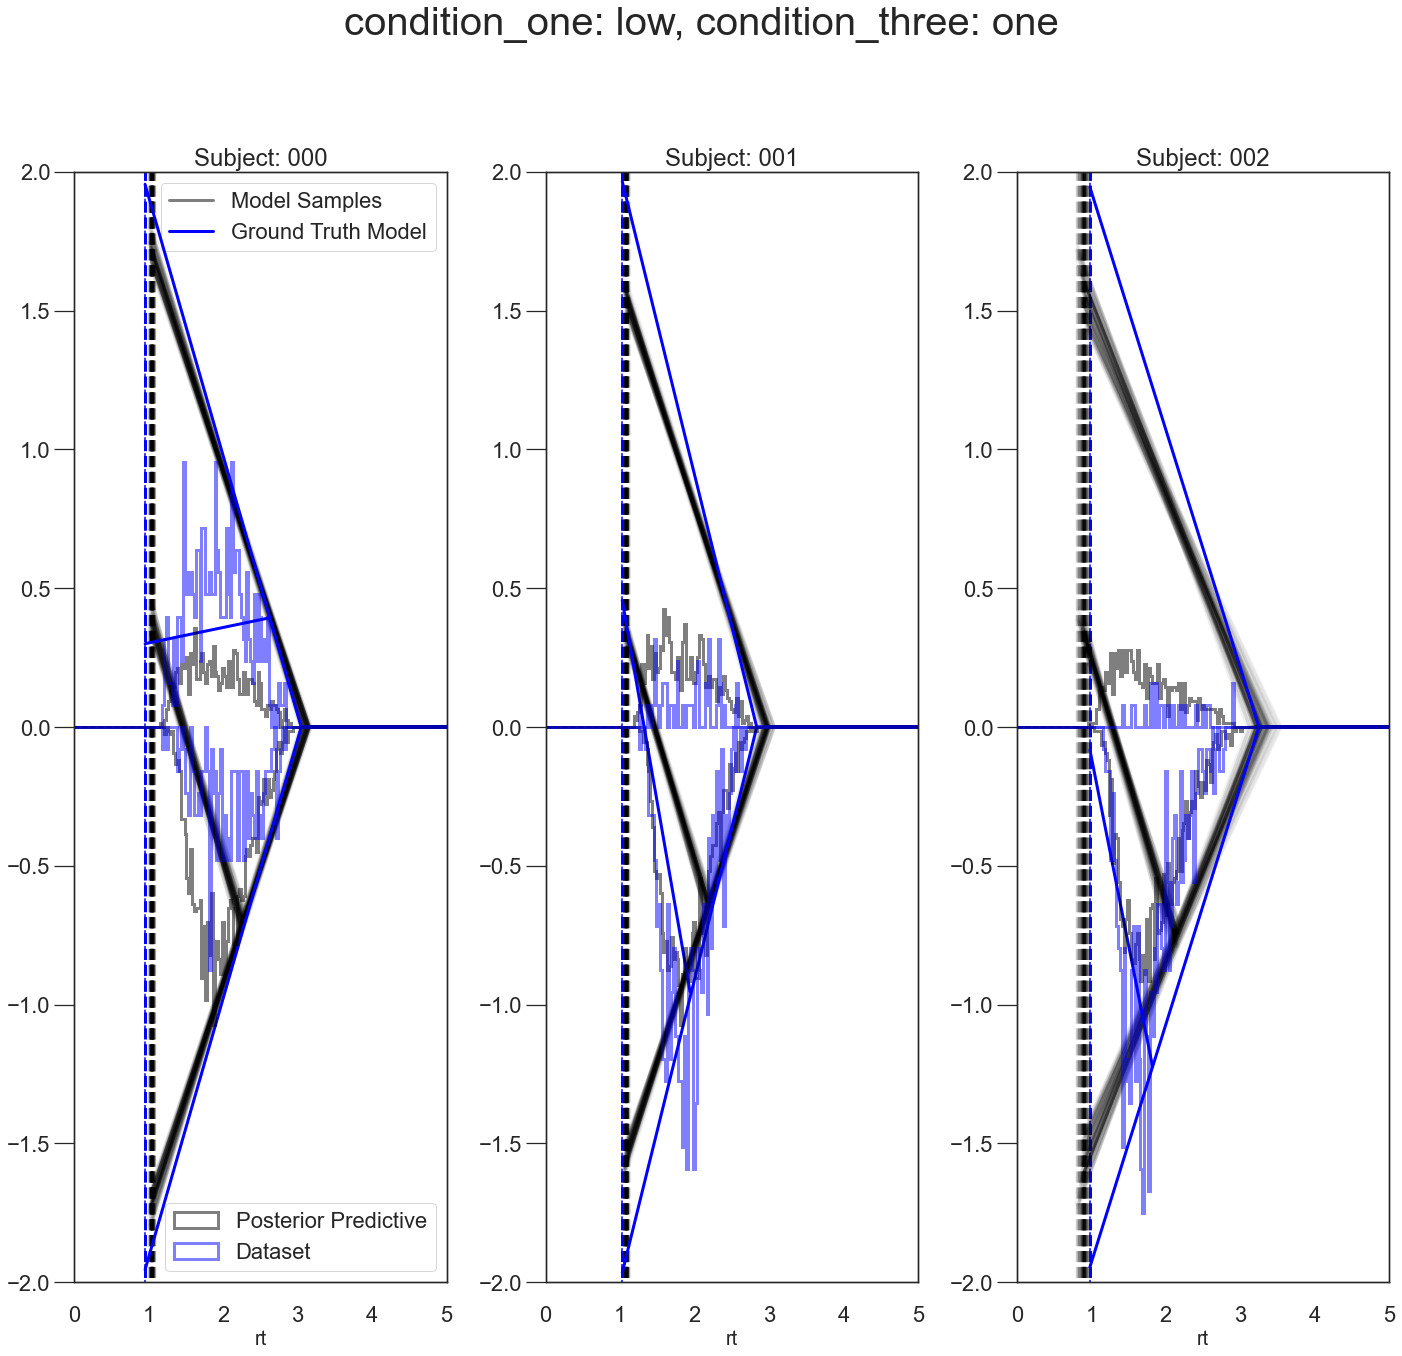

rows
1
columns
3


<Figure size 432x288 with 0 Axes>

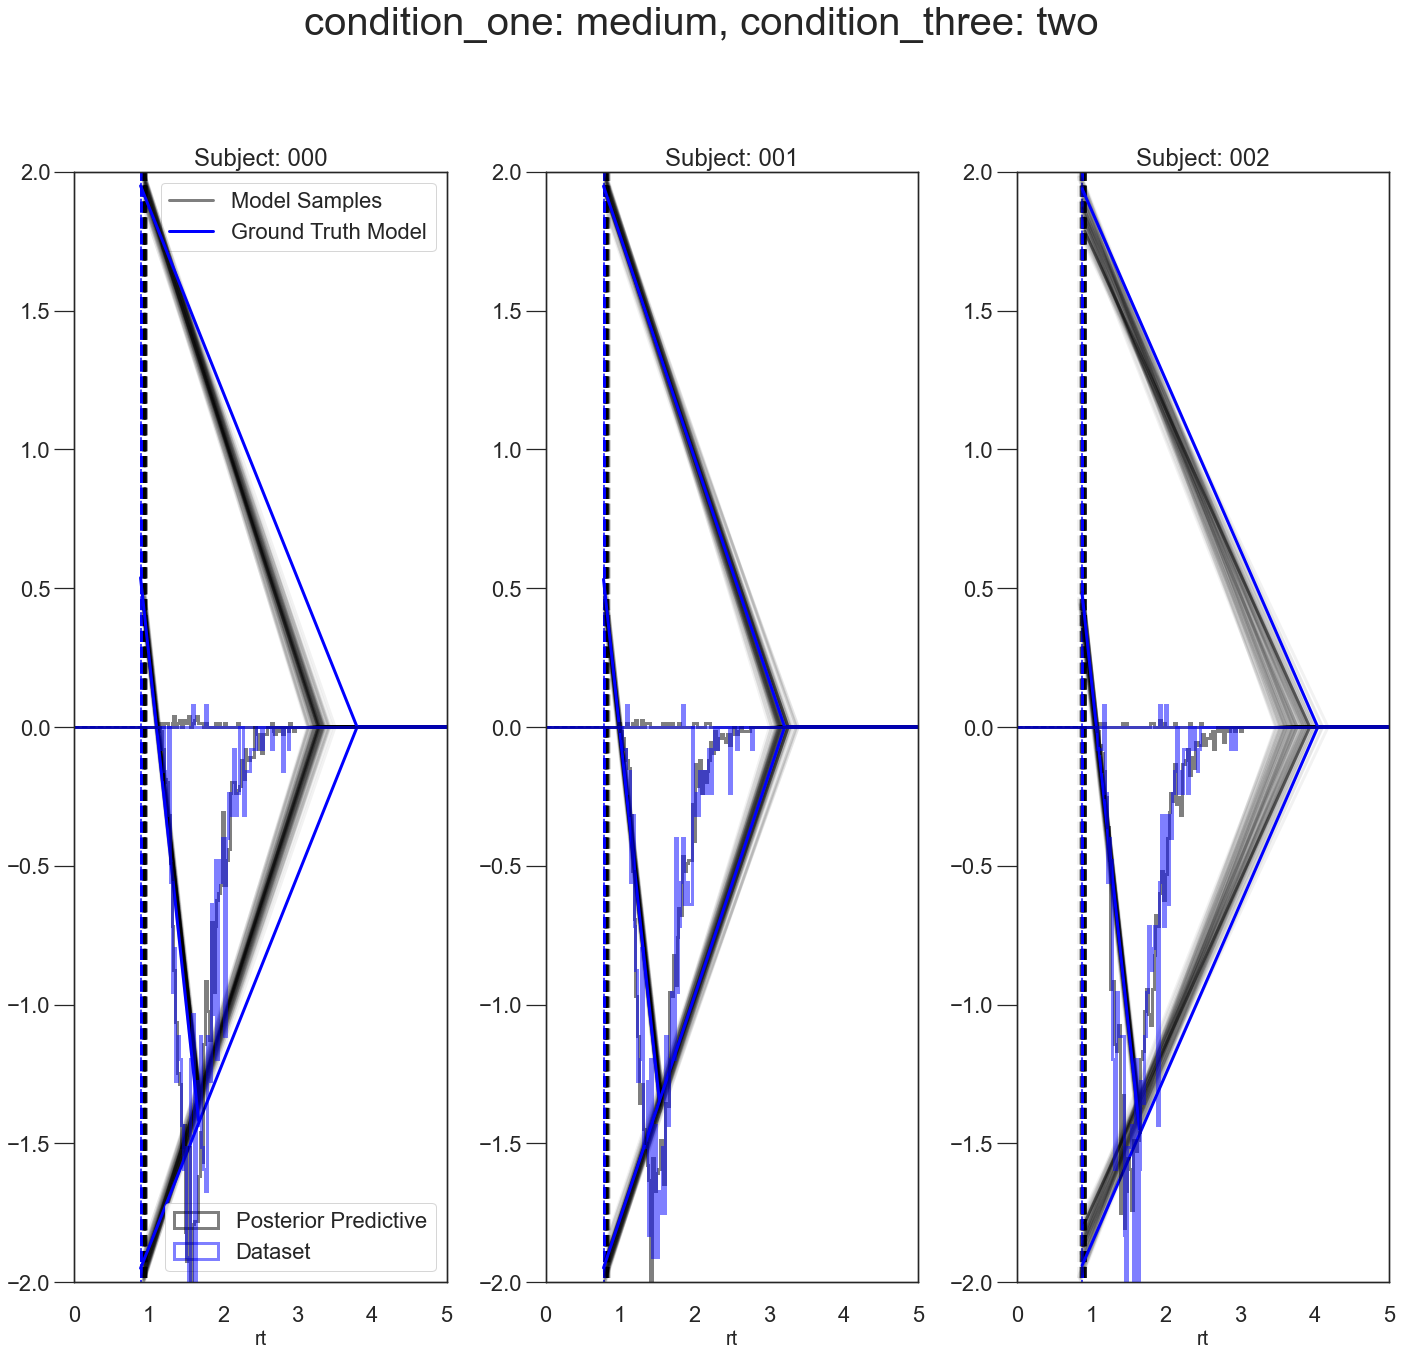

In [5]:
hddm.graphs.model_plot_new(hddm_model = hddmnn_model,
                           model_ground_truth = 'angle',
                           n_posterior_parameters = 100,
                           n_simulations_per_parameter = 30)

In [5]:
hddm.graphs.caterpillar_plot(hddm_model = hddmnn_model,
                             model_ground_truth = 'angle',
                             drop_sd = False)

AttributeError: module 'hddm.graphs' has no attribute 'caterpillar_plot'

params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(low).000', 'a_subj(low).001', 'a_subj(low).002', 't_subj(low.one).000', 't_subj(low.one).001', 't_subj(low.one).002', 'v(low)']
params_depends
{'a': ['condition_one'], 't': ['condition_three', 'condition_one'], 'v': ['condition_one']}
params subj_only
['theta']
params group only
['z', 'v']
params_default_fixed
[]
params
['theta_subj.000', 'theta_subj.001', 'theta_subj.002', 'z', 'a_subj(medium).000', 'a_subj(medium).001', 'a_subj(medium).002', 't_subj(medium.two).000', 't_subj(medium.two).001', 't_subj(medium.two).002', 'v(medium)']
keys of condition_wise_params dict
dict_keys([0, 1])
passed through with key  0
of keys:  dict_keys([0, 1])
passed through with key  1
of keys:  dict_keys([0, 1])
unique subject ids
['000' '001' '002

<Figure size 432x288 with 0 Axes>

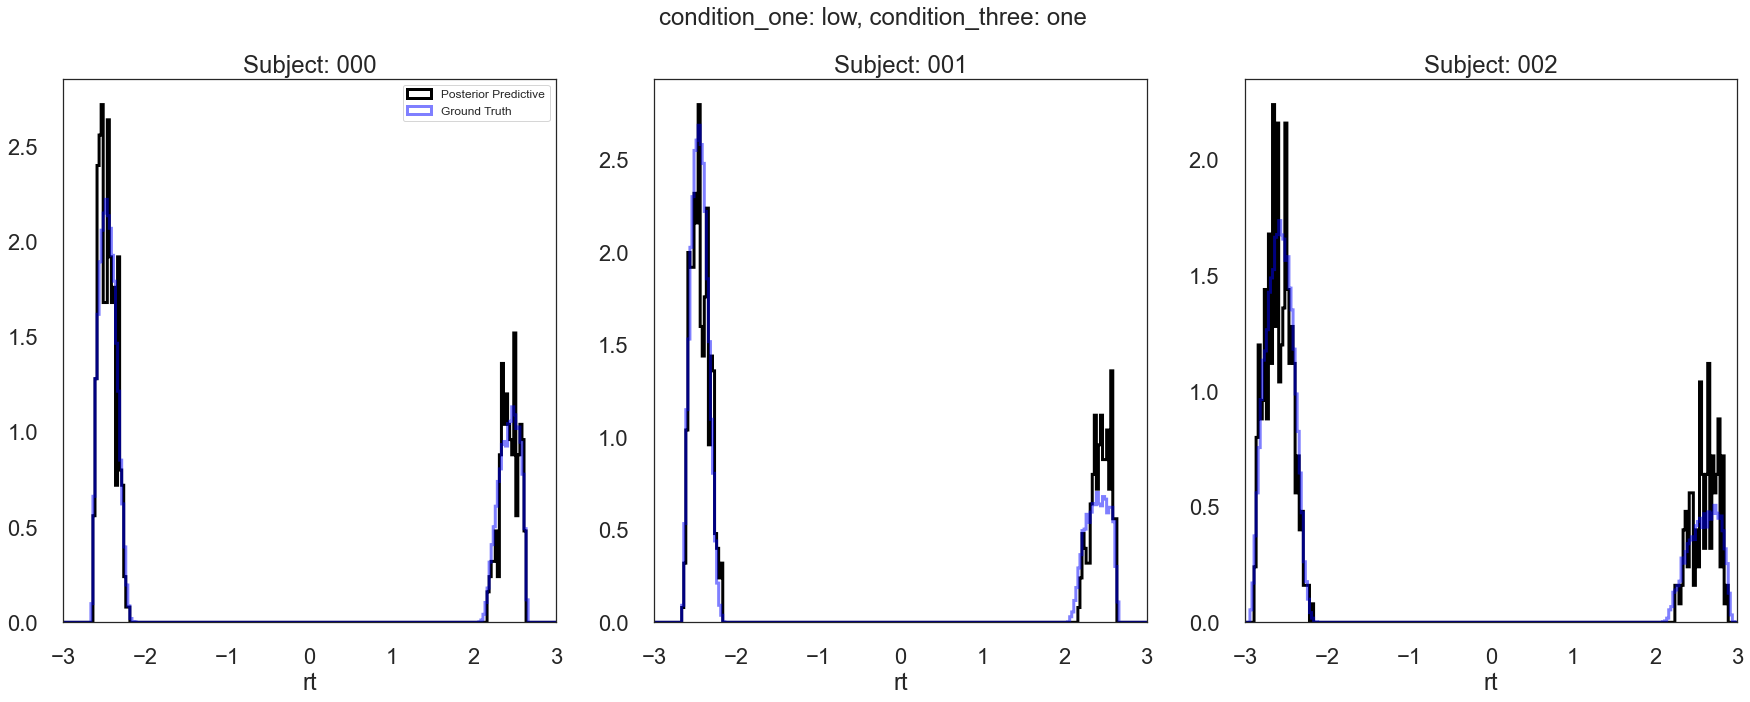

n subplots to plot
n subplots to plot
n subplots to plot


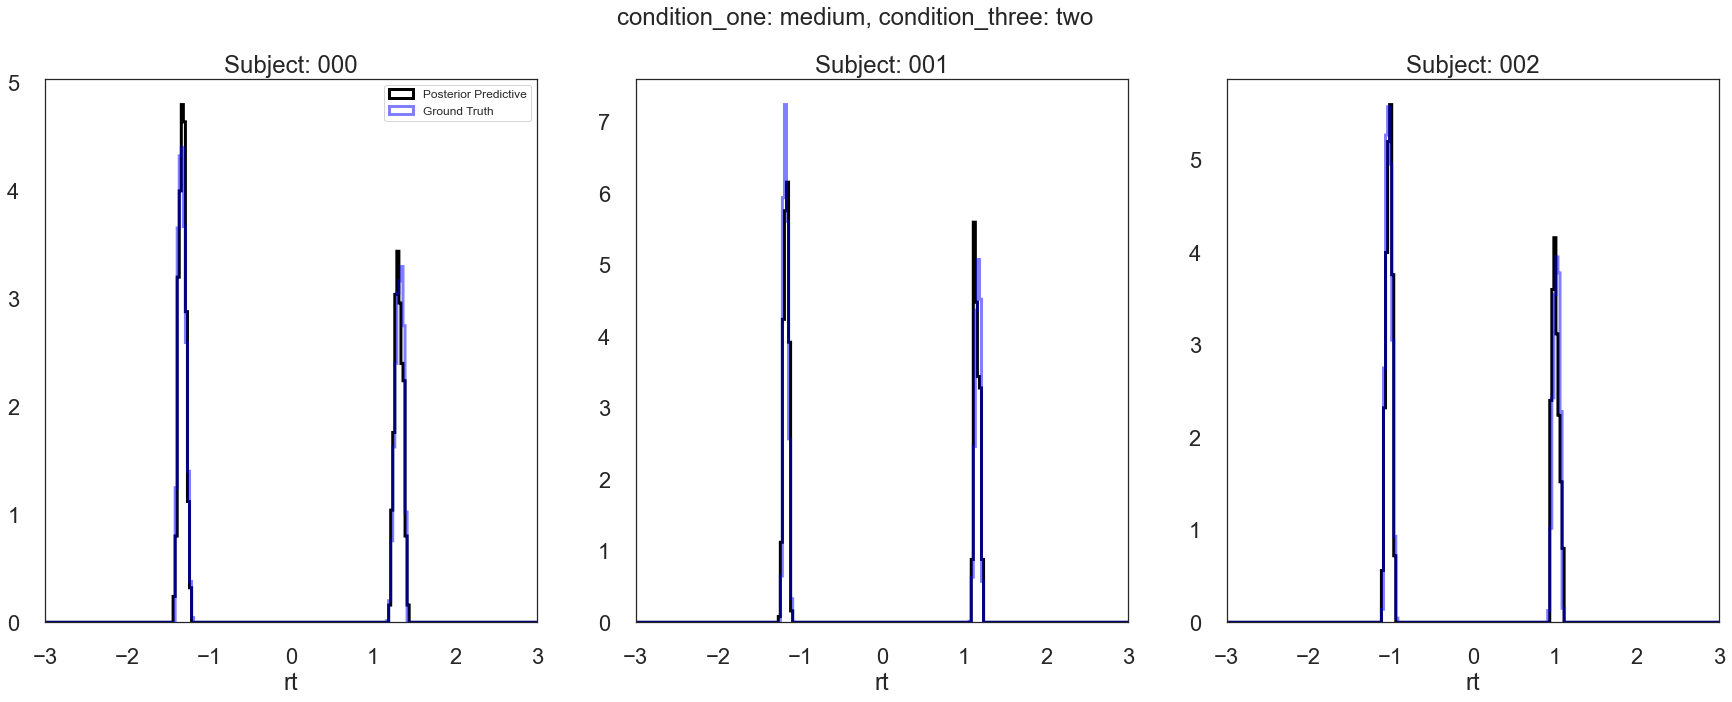

In [5]:
hddm.graphs.posterior_predictive_plot_new(hddm_model = hddmnn_model,
                                          model_ground_truth = 'angle',
                                          n_posterior_parameters = 50,
                                          show = True,
                                          xlimit = 3,
                                          scale_x = 1.5,
                                          save = True,
                                          )

In [6]:
hddm.graphs.posterior_pair_plot(hddm_model = hddmnn_model,
                                model_ground_truth = 'angle',
                                n_subsample = 50,
                                height = 6)

In [27]:
dir(hddmnn_model.mc)
#hddmnn_model.mc.trace('z_trans')[:]

['BPIC',
 'DIC',
 'OCValue',
 '_Sampler__status',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_database_backend',
 '_burn',
 '_burn_till_tuned',
 '_calc_bpic',
 '_calc_dic',
 '_csv_str',
 '_cur_trace_index',
 '_current_iter',
 '_db_args',
 '_dict_container',
 '_finalize',
 '_funs_to_tally',
 '_generations',
 '_get_bpic',
 '_get_deviance',
 '_get_dic',
 '_get_generations',
 '_get_logp',
 '_get_value',
 '_halt',
 '_iter',
 '_loop',
 '_n_tally',
 '_save_interval',
 '_sm_assigned',
 '_state',
 '_sum_deviance',
 '_thin',
 '_tune_interval',
 '_tune_throughout',
 '_tuned_count',
 '_tuning',
 '_value',
 '_variables_to_tally',
 'assign

In [35]:
for i in hddmnn_model.mc._variables_to_tally:
    print(i)

v_subj(minor).000
v_subj(minor).004
a_subj(medium).004
a_subj(medium).001
a_subj(low).002
v_std
t_subj(high.three).003
a(medium)
t_subj(medium.two).000
v_subj(modest).001
a_subj(medium).002
a_subj(high).003
a(high)
t_std
v_subj(minor).003
v_subj(major).000
theta_subj.000
t_subj(high.three).000
t_subj(medium.two).004
v_subj(modest).000
v_subj(modest).002
a_subj(high).002
a_subj(low).001
v_subj(major).002
theta_std
v(major)
t(high.three)
theta_subj.002
v_subj(minor).002
t_subj(high.three).002
theta
t_subj(low.one).004
t_subj(low.one).002
a_subj(high).001
t_subj(low.one).000
t_subj(low.one).003
v_subj(major).003
a_subj(low).000
t_subj(medium.two).001
theta_subj.003
v_subj(modest).003
a_subj(medium).003
z
a_std
a_subj(low).003
a_subj(medium).000
v_subj(modest).004
a_subj(low).004
t_subj(low.one).001
theta_subj.001
t_subj(high.three).001
t_subj(medium.two).002
a(low)
v_subj(major).004
t(low.one)
a_subj(high).000
t(medium.two)
theta_subj.004
v(modest)
t_subj(medium.two).003
t_subj(high.three

In [ ]:
hddmnn_model.get_subject_nodes()

In [41]:
hddmnn_model.mc.trace('a(high)')

In [42]:
for key in hddmnn_model.get_group_nodes().keys():
    print(key)

knode_name
stochastic
observed
subj
node
tag
depends
hidden
rt
response
subj_idx
v
a
z
t
theta
condition_one
condition_two
condition_three
mean
std
2.5q
25q
50q
75q
97.5q
mc err


In [ ]:
hddmnn_model.nodes

In [68]:
param_idx = mystr.find('_')
param_id = mystr[:name_idx]

if param_id is not 'z':
    print('This function applies inverse logit --> This applies to the z variable. ')
    print('Your are not applying the sigmoid transformation with the ', param_id, ' parameter')
    print('Is this intended ?')

In [181]:
hddmnn_model.get_traces()

a         v         t   z_trans
0   1.067453  1.552466  1.577548 -0.699061
1   1.083320  1.370935  1.585777 -0.271290
2   1.071518  1.478694  1.585076 -0.349197
3   1.065387  1.444327  1.596831 -0.373177
4   1.078263  1.532188  1.595048 -0.292166
..       ...       ...       ...       ...
95  1.099970  1.608996  1.575264 -0.422857
96  1.108380  1.556407  1.570452 -0.441576
97  1.120502  1.569276  1.573339 -0.378189
98  1.105000  1.513573  1.578296 -0.433447
99  1.111818  1.554544  1.570289 -0.366748

[100 rows x 4 columns]

In [28]:
out_hddm = filter_subject_condition_traces(hddm_model)

NameError: name 'hddm_model' is not defined

In [5]:
out_hddmnn = filter_subject_condition_traces(hddm_model = hddmnn_model)

NameError: name 'filter_subject_condition_traces' is not defined

In [59]:
out_hddmnn[0]['000']['gt_parameter_vector']

array([1.2969631, 1.879416, 0.7999201, 1.6483214], dtype=object)

In [267]:
hddmnn_model.get_traces()

a(high)    a(low)  a(medium)  v(major)  v(minor)  v(modest)  \
0   1.010584  2.483667   1.088430  1.219639  0.534062  -1.747244   
1   0.984868  2.470759   1.061539  1.001611  0.570623  -1.877115   
2   0.987237  2.492141   1.055289  1.122079  0.540108  -1.843582   
3   0.996411  2.445042   1.046748  1.096383  0.519867  -1.757487   
4   0.974559  2.487359   1.066036  1.132020  0.614246  -1.805366   
..       ...       ...        ...       ...       ...        ...   
95  1.016488  2.361048   1.109402  1.110919  0.541349  -1.865907   
96  0.961060  2.371202   1.147178  1.148152  0.568903  -1.752755   
97  0.961727  2.463790   1.095091  1.159106  0.585998  -1.722644   
98  0.925567  2.466605   1.079847  1.097377  0.609842  -1.682569   
99  0.964219  2.488342   1.099662  1.027027  0.550232  -1.869793   

    t(high.three)  t(low.one)  t(medium.two)   z_trans  
0        0.410017    1.651494       1.964268  1.832176  
1        0.414868    1.639943       1.982711  1.851607  
2        0.412762    1.587067       1.982635  1.783730  
3        0.412240    1.599132       1.960638  1.767557  
4        0.415389    1.626400       1.963405  1.747079  
..            ...         ...            ...       ...  
95       0.408505    1.628611       1.959801  1.692036  
96       0.403021    1.610438       1.940945  1.620741  
97       0.404988    1.615335       1.962814  1.590091  
98       0.412510    1.588516       1.959685  1.735270  
99       0.408982    1.617184       1.970415  1.745447  

[100 rows x 10 columns]

In [64]:
out_hddmnn[0]['000']

{'traces': array([[1.33571767, 1.36925728, 0.70757123, 1.63454228],
        [1.41819974, 1.39824291, 0.70680093, 1.62931596],
        [1.38695678, 1.39940849, 0.70305367, 1.63172565],
        [1.36093515, 1.35107499, 0.70830176, 1.64551577],
        [1.30561572, 1.32592214, 0.71326277, 1.65009833],
        [1.30192384, 1.3331958 , 0.71339879, 1.64294965],
        [1.36755178, 1.34711484, 0.7100565 , 1.6438082 ],
        [1.36194767, 1.35397233, 0.70602963, 1.64311519],
        [1.31533097, 1.31693658, 0.70425037, 1.64273498],
        [1.37218509, 1.38053888, 0.70473239, 1.63460085],
        [1.36915576, 1.40677287, 0.70992232, 1.63595822],
        [1.3568524 , 1.39165119, 0.71198984, 1.63826058],
        [1.34126992, 1.37046656, 0.7115591 , 1.64179334],
        [1.3345904 , 1.3813806 , 0.7141244 , 1.64385454],
        [1.34996156, 1.40365877, 0.71656241, 1.63106526],
        [1.30757509, 1.34485834, 0.70648565, 1.63959728],
        [1.30885152, 1.30092321, 0.70349752, 1.64919999],
    

In [66]:
mystr = 'aklsdjd'
mystr[:-1]

'aklsdj'

In [176]:
sim_data_list[0]

(           rt  response subj_idx condition_one condition_two condition_three
 0    1.763671       1.0      000           low         minor             one
 1    2.983697       0.0      000           low         minor             one
 2    3.818673       0.0      000           low         minor             one
 3    3.633687       0.0      000           low         minor             one
 4    3.613688       0.0      000           low         minor             one
 ..        ...       ...      ...           ...           ...             ...
 495  4.083654       0.0      000           low         minor             one
 496  3.142704       0.0      000           low         minor             one
 497  3.397704       0.0      000           low         minor             one
 498  3.100702       0.0      000           low         minor             one
 499  3.396704       0.0      000           low         minor             one
 
 [500 rows x 6 columns],
 {'v': -1.5874176553225536,
  'v_std'

In [166]:
hddmnn_model.get_traces()

a(high)    a(low)  a(medium)  v(major)  v(minor)  v(modest)  \
0   1.465892  1.845313   0.773002 -0.172965 -0.699076  -2.690013   
1   1.429392  1.784661   0.782247 -0.238707 -0.694001  -2.703958   
2   1.452827  1.890800   0.775778 -0.251731 -0.650605  -2.636165   
3   1.487137  1.791086   0.773068 -0.188868 -0.688783  -2.653751   
4   1.471814  1.725445   0.797278 -0.269587 -0.606067  -2.690687   
..       ...       ...        ...       ...       ...        ...   
95  1.456328  1.745025   0.750227 -0.201598 -0.645432  -2.622707   
96  1.441391  1.765733   0.740043 -0.188440 -0.641305  -2.485724   
97  1.468196  1.784617   0.716009 -0.143218 -0.658680  -2.524543   
98  1.494943  1.771108   0.706286 -0.150598 -0.642052  -2.495788   
99  1.489257  1.820838   0.699754 -0.178409 -0.645509  -2.538910   

    t(high.three)  t(low.one)  t(medium.two)  
0        1.297114    1.146493       0.671555  
1        1.303737    1.157725       0.674423  
2        1.303362    1.121297       0.666999  
3        1.265425    1.134121       0.667373  
4        1.251679    1.163448       0.668120  
..            ...         ...            ...  
95       1.256681    1.191260       0.679004  
96       1.261874    1.161881       0.682409  
97       1.258194    1.156977       0.685988  
98       1.274654    1.121362       0.687888  
99       1.277097    1.144304       0.684041  

[100 rows x 9 columns]

In [4]:
sim_data_frame

rt  response subj_idx         v         a         z         t  \
0    1.011465       0.0      000 -1.016198  0.616403  0.497322  0.260471   
1    0.353471       1.0      000 -1.016198  0.616403  0.497322  0.260471   
2    0.706469       0.0      000 -1.016198  0.616403  0.497322  0.260471   
3    0.307471       0.0      000 -1.016198  0.616403  0.497322  0.260471   
4    0.859467       0.0      000 -1.016198  0.616403  0.497322  0.260471   
..        ...       ...      ...       ...       ...       ...       ...   
495  5.357879       0.0      000 -1.377152  2.304945  0.768565  1.959943   
496  2.524939       1.0      000 -1.377152  2.304945  0.768565  1.959943   
497  4.689928       0.0      000 -1.377152  2.304945  0.768565  1.959943   
498  3.596963       0.0      000 -1.377152  2.304945  0.768565  1.959943   
499  4.034975       0.0      000 -1.377152  2.304945  0.768565  1.959943   

    condition_one condition_two condition_three  
0             low         minor             one  
1             low         minor             one  
2             low         minor             one  
3             low         minor             one  
4             low         minor             one  
..            ...           ...             ...  
495          high         major           three  
496          high         major           three  
497          high         major           three  
498          high         major           three  
499          high         major           three  

[1500 rows x 10 columns]

In [50]:
model_config = hddm.simulators.model_config

def untransform_traces(traces = None, model = None, is_nn = False):
    # Check if any traces have the 'trans' label and apply inverse logit transform to get the trace back in original parameterization
    for key in traces.keys():
        
        if '_trans' in key:
            param_idx = key.find('_')
            param_id = key[:param_idx]

            if param_id is not 'z':
                print('This function applies inverse logit --> This applies to the z variable. ')
                print('Your are not applying the sigmoid transformation with the ', param_id, ' parameter')
                print('Is this intended ?')
            
            if is_nn:
                lower_lim = model_config[model]['param_bounds'][0][model_config[model]['params'].index(param_id)]
                upper_lim = model_config[model]['param_bounds'][1][model_config[model]['params'].index(param_id)]
                
            else:
                lower_lim = 0
                upper_lim = 1
            
            val_tmp = lower_lim + (upper_lim - lower_lim) * (1 / ( 1 + np.exp(- traces[key])))
            traces[key] = val_tmp
            traces.rename(columns={key: key.replace('_trans', '')}, inplace = True)
    return traces

def get_subj_ids(data):
    # get unique subject ids corresponding to a data subset
    return data['subj_idx'].unique()

def subset_data(data, row_tmp):
    # note row_tmp is expected as a pandas series (shape (n,) DataFrame)
    data_subset = data
    #print(row_tmp)
    for key in row_tmp.keys():
        data_subset = data_subset.loc[data_subset[key] == row_tmp[key], :]
        #print(data_subset)
    return data_subset

def make_trace_plotready_h_c(trace_dict = None, model = '', is_group_model = None):
    # This should make traces plotready for the scenarios -->  condition, hierarchical (single model is dealt with trivially by using the traces as is and simply reordering the parmeters to match simulator inputs)
    # Function returns enough data to be flexibly usable across a variety of graphs. One just has to fish out the relevant parts.
    
    #n_subplots = [trace_dict[key]['traces'] for key in trace_dict.keys()]
    # dat_c = np.zeros((len(trace_dict.keys()), trace_dict[0]['traces'].shape[0], len(model_config[model]['params'])))
    dat_h_c = {}
    # dat_traces_c = {}
    # dat_traces_params_only_c = {}
    # dat_traces_h_c = {}
    # dat_traces_params_only_h_c = {}
    #subplot_n = 0
    #plot_n = 0

    for key in trace_dict.keys():
        dat_h_c[key] = {}
        # if is_group_model:
        #     dat_h_c[key] =  np.zeros((len(trace_dict[key]['data']['subj_idx'].unique()), trace_dict[key]['traces'].shape[0], len(model_config[model]['params'])))
        
        unique_subj_ids = trace_dict[key]['data']['subj_idx'].unique()
        print('unique subject ids')
        print(unique_subj_ids)
        #dat_traces_h_c[key] = {}
        #dat_traces_params_only_h_c[key] = {}
        #subplot_n = 0
        #rint(unique_subj_ids)

        for subj_id in unique_subj_ids:
            dat_h_c[key][subj_id] = {}
            # print(trace_dict[key])
            # print(key)
            # print(trace_dict[key]['traces'])
            dat_h_c[key][subj_id]['traces'] = np.zeros((trace_dict[key]['traces'].shape[0], len(model_config[model]['params'])))
            dat_h_c[key][subj_id]['data'] = trace_dict[key]['data'].loc[trace_dict[key]['data']['subj_idx'] == subj_id, :]
            
            # Check if data contais ground truth parameters
            test_passed = 1
            for check_param in model_config[model]['params']:
                print('running test with')
                print(check_param)
                print(list(dat_h_c[key][subj_id]['data'].keys()))
                if check_param in list(dat_h_c[key][subj_id]['data'].keys()):
                    print('passed')
                    pass
                else:
                    test_passed = 0
            print('still passed ? ')
            print(test_passed)
            
            # Dat gt_parameter_vector to dat_h_c dict 
            # If parameters not in the dataframe --> set to None
            if test_passed:
                dat_h_c[key][subj_id]['gt_parameter_vector'] = dat_h_c[key][subj_id]['data'].loc[0, :][[param for param in model_config[model]['params']]].values
                #x.loc[0, :][['one', 'two']].values
            else: 
                dat_h_c[key][subj_id]['gt_parameter_vector'] = None

            print('dat_h_c parameters vector')
            print(dat_h_c[key][subj_id]['gt_parameter_vector'])

            trace_names_tmp = []
            trace_names_param_only_tmp = []
            
            for trace_key in trace_dict[key]['traces'].keys():
                if ('subj' in trace_key) and (not (subj_id in trace_key)):
                    continue
                else:
                    trace_names_tmp.append(trace_key)
                    key_param_only = trace_key 
                    
                    if 'subj' in trace_key and subj_id in trace_key:
                        key_param_only = trace_key.split('_')[0]
                    if not ('subj' in trace_key) and ('(' in trace_key):
                        key_param_only = trace_key.split('(')[0]

                    trace_names_param_only_tmp.append(key_param_only)

                    dat_h_c[key][subj_id]['traces'][:, model_config[model]['params'].index(key_param_only)] = trace_dict[key]['traces'][trace_key]
                    full_condition_subj_label = trace_dict[key]['condition_label'].copy()
                    if trace_dict[key]['condition_label'] is not None:
                        full_condition_subj_label['subj_idx'] = subj_id
                    else:
                        full_condition_subj_label = pd.DataFrame(subj_id, columns = ['subj_idx'])

                    dat_h_c[key][subj_id]['cond_subj_label'] = full_condition_subj_label

                    # else:
                    #     dat_c[plot_n, :, model_config[model]['params'].index(key_param_only)] = trace_dict[key]['traces'][trace_key]
                    #     #dat_traces_c

            dat_h_c[key][subj_id]['trace_names'] = trace_names_tmp
            #dat_traces_params_only_h_c[key][subplot_n] = trace_names_param_only_tmp
        #plot_n += 1

    #if is_group_model:
    return (dat_h_c) #, dat_traces_h_c, dat_traces_params_only_h_c)
    #else:
    #    return (dat_c, dat_traces_c, dat_traces_params_only_c)
          
def pick_out_params_h_c(condition_dataframe = None,  data = None, params_default_fixed = None, params_subj_only = None, params_depends = None, is_group_model = True):
    
    # params_default_fixed
    # just store and add fixed vals

    # params_subj_only
    param_ids = list(params_default_fixed)
    ids = get_subj_ids(data = data)

    if not is_group_model:
       for param_tmp in params_subj_only:
           param_str = param_tmp
           param_ids.append(param_str)
    else:
        for param_tmp in params_subj_only:
            for id_tmp in ids:
                # make str
                param_str = param_tmp + '_subj.' + str(id_tmp)
                param_ids.append(param_str)

    # params_depends
    out_dict = {}
    if condition_dataframe is not None:
        n_ = condition_dataframe.shape[0]
        for i in range(n_):
            #print(i)
            
            param_ids_by_condition = param_ids.copy()
            
            for param_tmp in params_depends.keys():
                depend_cols = params_depends[param_tmp]
                depend_cols_sorted = np.array(depend_cols)[np.argsort(np.array([list(condition_dataframe.keys()).index(col) for col in depend_cols]))]
                row_tmp = condition_dataframe.iloc[i][depend_cols]
                data_subset = subset_data(data = data, row_tmp = row_tmp)
                #print('unique subject ids')

                #print(data_subset['subj_idx'].unique())
                if is_group_model:
                    ids = get_subj_ids(data = data_subset)
                    for id_tmp in ids:
                        # make str 
                        param_str = param_tmp + '_subj' + '(' + '.'.join([str(row_tmp[col_tmp]) for col_tmp in depend_cols_sorted]) + ').' + id_tmp 
                        param_ids_by_condition.append(param_str)
                else: 
                    param_str = param_tmp + '(' + '.'.join([str(row_tmp[col_tmp]) for col_tmp in depend_cols_sorted]) + ')'
                    param_ids_by_condition.append(param_str)
            
            out_dict[i] = {'data': data_subset.copy(), 'params': param_ids_by_condition.copy(), 'condition_label': condition_dataframe.iloc[i]}
            
    else: 
        out_dict[0] = {'data': data, 'params': param_ids, 'condition_label': None}

    #print(out_dict)
    return out_dict

def filter_subject_condition_traces(hddm_model):
    data = hddm_model.data
    
    # Since hddm asks only for parameters in addition to 'a', 'v', 't' in the include statement
    # for the logic applied here we add those back in to get the full set of parameters which where fit

    # This works for all models thus far includes (since they follow the 'a', 'v', 't' parameterization)

    # AF-TODO: If adding in other models to HDDM --> we might need a condition here in case some models do not include ['a', 'v', 't'] in the parameters
    includes_full = list(hddm_model.include) + ['a', 'v', 't']
    is_group_model = hddm_model.is_group_model
    depends = hddm_model.depends_on

    # If hddmnn get model attribute from arguments
    if hddm_model.nn:
        tmp_cfg = hddm.simulators.model_config[hddm_model.model]
        model = hddm_model.model # AF-TODO --> Make 'model' part of args for all HDDM classes

    # If hddm vanilla --> more labor 
    else:
        if 'sv' in includes_full or 'st' in includes_full or 'sz' in includes_full:
            model = 'full_ddm'
            tmp_cfg = hddm.simulators.model_config['full_ddm']
            # include_diff = set(hddm.simulators.model_config[hddm_model.model]) - set(includes)

        else:
            tmp_cfg = hddm.simulators.model_config['ddm']
            model = 'ddm'
            # include_diff = set(hddm.simulators.model_config[hddm_model.model]) - set(includes) 

    includes_diff = set(tmp_cfg['params']) - set(includes_full)

    # Note: There are two kinds of plots
    # subject wise posterior predictive: -> using the subject level parameterizations
    # global posterior predictive: -> sample parameterizations from the group distributions and simulate from there (loses any subject specific information other than what was 'learned' through the group level from the data)
    # TODO: global posterior predictive

    # Here we care about subject wise posterior predictives

    # Scenario 1: We have multiple conditions and / or a group model
    # Use Hierarchical DataFrame
    if depends is not None or (depends is None and is_group_model):
        # Get parameters that have condition dependence (finally condition + subj)
        if depends is not None:
            params_depends = list(depends.keys())

            condition_list = []
            for key in depends.keys():
                if type(depends[key]) == str and not (depends[key] in condition_list):
                    condition_list.append(depends[key])
                elif type(depends[key]) == list:
                    for tmp_depend in depends[key]:
                        # print('tmp_depend')
                        # print(tmp_depend)
                        # print('condition_list')
                        # print(condition_list)
                        if not (tmp_depend in condition_list):
                            condition_list.append(tmp_depend)
                else:
                    pass
    
            #condition_list = [depends[key] for key in depends.keys()]
            # print('condition_list')
            # print(condition_list)
            condition_dataframe = data.groupby(condition_list).size().reset_index().drop(labels = [0], axis = 1) #.rename(columns = {0: 'count'}).drop(labels = ['count'], axis = 1)
            # print('condition dataframe')
            # print(condition_dataframe)
        else:
            params_depends = []
            condition_dataframe = None
    
        #n_frames = condition_dataframe.shape[0]

        #print(condition_dataframe)
        #print(n_frames)
        
        # Get parameters that have no condition dependence (only subj) (but were fit)
        params_subj_only = list(set(includes_full) - set(params_depends))

        # Get parameters that were not even fit

        # Have to add these parameters to the final trace objects
        params_default_fixed = includes_diff # was computed above
        traces = untransform_traces(hddm_model.get_traces(), model = model, is_nn = hddm_model.nn) #untransform_traces(hddm_model.get_traces())

        # Now for each 'frame' define the trace columns which we want to keep !
        # condition_wise_params_dict defines a dictionary which holds the necessary trace data for each 'condition'
        condition_wise_params_dict = pick_out_params_h_c(condition_dataframe,
                                                         data = data, 
                                                         params_default_fixed = params_default_fixed, 
                                                         params_subj_only = params_subj_only,
                                                         params_depends = depends,
                                                         is_group_model = is_group_model)
        
        print('keys of condition_wise_params dict')
        print(condition_wise_params_dict.keys())
        
        for key_tmp in condition_wise_params_dict.keys():
            print('passed through with key ', key_tmp)
            print('of keys: ', condition_wise_params_dict.keys())

            # TODO: Add parameters which where not fit by extending traces with defaults for those!
            #print('includes diff')
            #print(includes_diff)
            #print(condition_wise_params_dict[key]['params'])
            
            # Condition wise params carries all expected parameter names for a given condition
            # Some of these might not have been fit so for the tracees we want to set those to the 'default' as specified by the model config
           
            # --> Copy parameter names and add traces for included parameters (for which we HAVE traces)
            included_params = condition_wise_params_dict[key_tmp]['params'].copy()
            for param_not_included in list(includes_diff):
                included_params.remove(param_not_included)

            # print('included params')
            # print(included_params)
            condition_wise_params_dict[key_tmp]['traces'] = traces[included_params].copy()


            # --> Add in 'fake' traces for parameters that where fixed as 'default value' as specified by model config
            #print('includes diff')
            #print(includes_diff)
            for param_not_included in list(includes_diff):
                #print(condition_wise_params_dict[key]['traces'])
                condition_wise_params_dict[key_tmp]['traces'][param_not_included] = model_config[model]['default_params'][model_config[model]['params'].index(param_not_included)]
            

        #if is_group_model:
        # (plotready_traces, other_data, other_data_2) = make_trace_plotready_h_c(trace_dict = condition_wise_params_dict, 
        #                                                                         model = model, 
        #                                                                         is_group_model = is_group_model)

        plotready_traces = make_trace_plotready_h_c(trace_dict = condition_wise_params_dict, 
                                                    model = model, 
                                                    is_group_model = is_group_model)

        #print(other_data)

        #else if depends is not None:
        #    plotready_traces = make_plotready_condition()
        return plotready_traces # , condition_wise_params_dict) #, other_data, other_data_2)
        #return condition_wise_params_dict
    
    # Scenario 2: Single condition single subject model (or data collapsed across subjects)
    else:
        traces = untransform_traces(hddm_model.get_traces(), model = model) #untransform_traces(hddm_model.get_traces())

        # Traces transformed into plot-expected format:
        # dim 1: plot number
        # dim 2: subplot number
        # dim 3: trace row
        # dim 4: trace col
        traces_array = np.zeros((1, 1, traces.shape[0], traces.shape[1]))
        for trace_key in traces.keys():
            traces_array[0, 0, :, model_config[model]['params'].index(trace_key)] = traces[trace_key].copy()


        ######
        # Check if data contais ground truth parameters
        test_passed = 1
        for check_param in model_config[model]['params']:
            if check_param in list(data.keys()):
                pass
            else:
                test_passed = 0
        
        # Dat gt_parameter_vector to dat_h_c dict 
        # If parameters not in the dataframe --> set to None
        if test_passed:
            gt_parameters = data.loc[0, :][[param for param in model_config[model]['params']]].values

            #dat_h_c[key][subj_id]['gt_parameter_vector'] = dat_h_c[key][subj_id]['data'].loc[0, :][[param for param in model_config[model]['params']]].values
            #x.loc[0, :][['one', 'two']].values
        else: 
            gt_parameters = None
        ######

        
        out_dict = {0:{0:{'data': data, 'params': hddm.simulators.model_config[model]['params'], 'traces': traces_array, 'gt_parameter_vector': gt_parameters}}}
        return out_dict

    # Scenario 3: Group Model but plot group level dists
    if is_group_model:
        pass

In [283]:
model_config

{'ddm': {'params': ['v', 'a', 'z', 't'],
  'param_bounds': [[-3.0, 0.3, 0.1, 0.001], [3.0, 2.5, 0.9, 2.0]],
  'param_bounds_cnn': [[-2.5, 0.5, 0.25, 0.001], [2.5, 2.2, 0.75, 1.95]],
  'boundary': <function hddm.simulators.boundary_functions.constant(t=0)>,
  'n_params': 4,
  'default_params': [0.0, 1.0, 0.5, 0.001],
  'hddm_include': ['z']},
 'angle': {'params': ['v', 'a', 'z', 't', 'theta'],
  'param_bounds': [[-3.0, 0.3, 0.2, 0.001, -0.1], [3.0, 2.0, 0.8, 2.0, 1.45]],
  'param_bounds_cnn': [[-2.5, 0.2, 0.1, 0.0, 0.0],
   [2.5, 2.0, 0.9, 2.0, 1.3707963267948966]],
  'boundary': <function hddm.simulators.boundary_functions.angle(t=1, theta=1)>,
  'n_params': 5,
  'default_params': [0.0, 1.0, 0.5, 0.001, 0.0],
  'hddm_include': ['z', 'theta']},
 'weibull': {'params': ['v', 'a', 'z', 't', 'alpha', 'beta'],
  'param_bounds': [[-2.5, 0.3, 0.2, 0.001, 0.31, 0.31],
   [2.5, 2.5, 0.8, 2.0, 4.99, 6.99]],
  'param_bounds_cnn': [[-2.5, 0.2, 0.1, 0.0, 0.5, 0.5],
   [2.5, 2.0, 0.9, 2.0, 5.0, 7.0]]

In [190]:
hddmnn_model.get_non_observeds()


knode_name stochastic observed   subj     node tag depends hidden  \
a                a       True    False  False        a  ()      []  False   
v                v       True    False  False        v  ()      []  False   
t                t       True    False  False        t  ()      []  False   
z_trans    z_trans       True    False  False  z_trans  ()      []   True   
z                z      False    False  False        z  ()      []  False   

          rt response  ... condition_two condition_three      mean        std  \
a        NaN      NaN  ...           NaN             NaN   1.13499  0.0546394   
v        NaN      NaN  ...           NaN             NaN   1.58307  0.0822754   
t        NaN      NaN  ...           NaN             NaN     1.556  0.0276669   
z_trans  NaN      NaN  ...           NaN             NaN       NaN        NaN   
z        NaN      NaN  ...           NaN             NaN  0.398827  0.0200497   

             2.5q       25q       50q       75q     97.5q      mc err  
a         1.03906   1.09806   1.12186   1.17971   1.23778  0.00546394  
v         1.44433   1.51857   1.57686   1.63833   1.73255  0.00822754  
t         1.48768   1.54087   1.56065    1.5783   1.59501  0.00276669  
z_trans       NaN       NaN       NaN       NaN       NaN         NaN  
z        0.365868  0.384137  0.398641  0.414643  0.441979  0.00200497  

[5 rows x 22 columns]

In [195]:
for (name, node) in hddmnn_model.iter_non_observeds():
    print(name)
    print(node['node'])

a
a
v
v
t
t
z_trans
z_trans
z
z


In [205]:
x = pd.DataFrame(np.zeros((100, 2)), columns = ['one', 'two'])

In [207]:
y = x.groupby('two')

In [219]:
y.groups.keys()

dict_keys([0.0])

In [199]:
hddmnn_model.mc.stats()

{'a': {'n': 100,
  'standard deviation': 0.054639388907537355,
  'mean': 1.134986910507025,
  '95% HPD interval': array([1.03829227, 1.23641127]),
  'mc error': 0.005463938890753735,
  'quantiles': {2.5: 1.0390599131006317,
   25: 1.0980604661641604,
   50: 1.1218626508963034,
   75: 1.1797087176210903,
   97.5: 1.2377837672625662}},
 't': {'n': 100,
  'standard deviation': 0.027666919853514382,
  'mean': 1.555997645993492,
  '95% HPD interval': array([1.49771628, 1.59683063]),
  'mc error': 0.0027666919853514384,
  'quantiles': {2.5: 1.4876781730279716,
   25: 1.5408671815878985,
   50: 1.5606511430309797,
   75: 1.5782963095430553,
   97.5: 1.5950059609491063}},
 'v': {'n': 100,
  'standard deviation': 0.08227541309030742,
  'mean': 1.5830712980781891,
  '95% HPD interval': array([1.44432697, 1.73255104]),
  'mc error': 0.008227541309030742,
  'quantiles': {2.5: 1.444326972728045,
   25: 1.5185670251658532,
   50: 1.5768641372579255,
   75: 1.6383338835028682,
   97.5: 1.732551039585

In [168]:
out_hddmnn[0]

{0: array([[[-2.16100929,  0.99286919,  0.5       ,  1.37459516],
         [-2.15167537,  1.00378854,  0.5       ,  1.37594764],
         [-2.32763848,  0.98936437,  0.5       ,  1.38144156],
         ...,
         [-2.34194877,  0.93768933,  0.5       ,  1.40704359],
         [-2.31145868,  1.00041206,  0.5       ,  1.39389316],
         [-2.41063645,  1.00365254,  0.5       ,  1.39123926]],
 
        [[-2.39401403,  0.9937934 ,  0.5       ,  1.44879461],
         [-2.28101961,  0.97415139,  0.5       ,  1.45747404],
         [-2.32148924,  1.01040557,  0.5       ,  1.45333971],
         ...,
         [-2.3232436 ,  0.95319633,  0.5       ,  1.46811622],
         [-2.26046577,  0.96588398,  0.5       ,  1.45392298],
         [-2.33363487,  0.98290322,  0.5       ,  1.45707839]],
 
        [[-2.16374604,  1.00866978,  0.5       ,  1.36958919],
         [-2.22838163,  1.01192463,  0.5       ,  1.35519788],
         [-2.18450945,  1.04612673,  0.5       ,  1.36601244],
         ...,
    

In [85]:
sim_data_list[0]

(           rt  response subj_idx condition_one condition_two condition_three
 0    0.151305       1.0      000           low         minor             one
 1    0.214305       0.0      000           low         minor             one
 2    0.059305       0.0      000           low         minor             one
 3    0.295305       0.0      000           low         minor             one
 4    0.147305       0.0      000           low         minor             one
 ..        ...       ...      ...           ...           ...             ...
 495  0.119084       0.0      004           low         minor             one
 496  0.063084       0.0      004           low         minor             one
 497  0.221084       1.0      004           low         minor             one
 498  0.074084       0.0      004           low         minor             one
 499  0.048084       0.0      004           low         minor             one
 
 [2500 rows x 6 columns],
 {'v': -0.48484514440094006,
  'v_st

In [118]:
mytest = hddmnn_model.data.copy()

In [108]:
mytest['hello'] = mytest['rt']

In [120]:
mytest.loc[:, 'hello'] = mytest['rt']

In [121]:
mytest

rt  response subj_idx condition_one condition_two condition_three  \
0    11.338793      -1.0      000           low         minor             one   
1     1.921383       1.0      000           low         minor             one   
2     3.103413       1.0      000           low         minor             one   
3     1.826384       1.0      000           low         minor             one   
4     4.197363       1.0      000           low         minor             one   
..         ...       ...      ...           ...           ...             ...   
495   1.419174       1.0      004          high         major           three   
496   1.633175       1.0      004          high         major           three   
497   1.413175      -1.0      004          high         major           three   
498   1.548175       1.0      004          high         major           three   
499   1.528175       1.0      004          high         major           three   

         hello  
0    11.338793  
1     1.921383  
2     3.103413  
3     1.826384  
4     4.197363  
..         ...  
495   1.419174  
496   1.633175  
497   1.413175  
498   1.548175  
499   1.528175  

[7500 rows x 7 columns]

In [69]:
condition = 0
for key in sim_data_list[condition][1].keys():
    if 'v_subj' in key:
        print(key, sim_data_list[condition][1][key])

v_subj.000 -0.0499071329832077
v_subj.001 -0.04751849174499512
v_subj.002 -0.07890881597995758
v_subj.003 -0.7408998012542725
v_subj.004 -1.0951217412948608


In [70]:
sim_data_list[condition]

(           rt  response subj_idx condition_one condition_two condition_three
 0    0.151305       1.0      000           low         minor             one
 1    0.214305       0.0      000           low         minor             one
 2    0.059305       0.0      000           low         minor             one
 3    0.295305       0.0      000           low         minor             one
 4    0.147305       0.0      000           low         minor             one
 ..        ...       ...      ...           ...           ...             ...
 495  0.119084       0.0      004           low         minor             one
 496  0.063084       0.0      004           low         minor             one
 497  0.221084       1.0      004           low         minor             one
 498  0.074084       0.0      004           low         minor             one
 499  0.048084       0.0      004           low         minor             one
 
 [2500 rows x 6 columns],
 {'v': -0.48484514440094006,
  'v_st

In [86]:
collected_vs = []
for key in hddmnn_model.get_traces().keys():
    if 'v' in key:
        collected_vs.append(key)

np.mean(hddmnn_model.get_traces()[collected_vs])

v(major)             -0.491258
v(minor)             -0.447133
v(modest)             0.612652
v_std                 0.231547
v_subj(major).000    -0.467677
v_subj(major).001    -0.590131
v_subj(major).002    -0.515254
v_subj(major).003    -0.518494
v_subj(major).004    -0.392840
v_subj(minor).000    -0.172731
v_subj(minor).001    -0.277581
v_subj(minor).002    -0.314084
v_subj(minor).003    -0.649837
v_subj(minor).004    -0.811962
v_subj(modest).000    0.785131
v_subj(modest).001    0.502423
v_subj(modest).002    0.788286
v_subj(modest).003    0.403458
v_subj(modest).004    0.591125
dtype: float64

In [87]:
condition = 1
collected_vs = []
for key in out_hddmnn[1][condition]['traces'].keys():
    if 'v_subj' in key:
        collected_vs.append(key)

print(np.mean(out_hddmnn[1][condition]['traces'][collected_vs], axis = 0))
print(out_hddmnn[1][condition]['data'].iloc[0])

v_subj(minor).000   -0.172731
v_subj(minor).001   -0.277581
v_subj(minor).002   -0.314084
v_subj(minor).003   -0.649837
v_subj(minor).004   -0.811962
dtype: float64
rt                 0.151305
response                  1
subj_idx                000
condition_one           low
condition_two         minor
condition_three         one
Name: 0, dtype: object


In [221]:
out_hddmnn[1]['data']

rt  response subj_idx condition_one condition_two condition_three
0    1.869527      -1.0      000           low         minor             one
1    1.872527       1.0      000           low         minor             one
2    1.995525       1.0      000           low         minor             one
3    2.863531       1.0      000           low         minor             one
4    1.895527      -1.0      000           low         minor             one
..        ...       ...      ...           ...           ...             ...
495  2.334521       1.0      000           low         minor             one
496  2.185523       1.0      000           low         minor             one
497  2.546518      -1.0      000           low         minor             one
498  2.912534       1.0      000           low         minor             one
499  2.037525       1.0      000           low         minor             one

[500 rows x 6 columns]

In [64]:
out_hddmnn[1]

{0: {'data':            rt  response subj_idx condition_one condition_two condition_three
  0    3.239540      -1.0      000          high         major           three
  1    2.117557      -1.0      000          high         major           three
  2    1.183542      -1.0      000          high         major           three
  3    1.166542      -1.0      000          high         major           three
  4    1.355539      -1.0      000          high         major           three
  ..        ...       ...      ...           ...           ...             ...
  495  5.764236       1.0      004          high         major           three
  496  3.856374      -1.0      004          high         major           three
  497  7.512109      -1.0      004          high         major           three
  498  6.990147      -1.0      004          high         major           three
  499  3.875373      -1.0      004          high         major           three
  
  [2500 rows x 6 columns],
  'params':

In [81]:
out_hddmnn[1][1]['condition_label'].keys()

Index(['condition_one', 'condition_two', 'condition_three'], dtype='object')

In [558]:
sim_data_list[2]

(           rt  response subj_idx condition_one condition_two condition_three
 0    1.753905       1.0      000          high         major           three
 1    1.935906       0.0      000          high         major           three
 2    1.861905       0.0      000          high         major           three
 3    1.768905       1.0      000          high         major           three
 4    1.929906       1.0      000          high         major           three
 ..        ...       ...      ...           ...           ...             ...
 495  1.837284       1.0      004          high         major           three
 496  1.727284       1.0      004          high         major           three
 497  1.671284       1.0      004          high         major           three
 498  1.781284       1.0      004          high         major           three
 499  2.121280       0.0      004          high         major           three
 
 [2500 rows x 6 columns],
 {'v': 2.0,
  'v_std': 2.0,
  'a': 0

In [425]:
mystr = 'x_subj'
mystr.split('_')[0]

'x'

In [406]:
labels = out[0]['traces'].keys()

In [289]:
hddm_model.data.keys()

Index(['rt', 'response', 'subj_idx', 'condition_one', 'condition_two',
       'condition_three'],
      dtype='object')

In [168]:
df = hddm_model.data
df.loc[df['rt'] > 0, :]

rt  response subj_idx condition_one condition_two condition_three
0    2.565107       1.0      000           low         minor             one
1    1.712092       1.0      000           low         minor             one
2    4.589028       1.0      000           low         minor             one
3    4.049067       1.0      000           low         minor             one
4    5.482964       1.0      000           low         minor             one
..        ...       ...      ...           ...           ...             ...
481  1.132830       1.0      004          high         major           three
487  0.650835       1.0      004          high         major           three
490  0.609834       1.0      004          high         major           three
491  0.547834       1.0      004          high         major           three
493  0.859833       1.0      004          high         major           three

[5583 rows x 6 columns]

In [170]:
df['condition_one'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]

In [260]:
hddm_model.data['subj_idx'].values[0]

'000'

In [326]:
np.array(['a', 'b'])

array(['a', 'b'], dtype='<U1')

In [ ]:
q = data.iloc[0]
qs = [q, q]
# then updating 
qs[0] = 10
# doesn't work !!! ???

In [257]:
def subset_data(data, row_tmp):
    # note row_tmp is expected as a pandas series (shape (n,) DataFrame)
    data_subset = data
    print(row_tmp)
    for key in row_tmp.keys():
        data_subset = data_subset.loc[data_subset[key] == row_tmp[key], :]
        print(data_subset)
    return data_subset
    

In [231]:
def get_subj_ids(data):
    return data['subj_idx'].unique()

In [333]:
def untransform_traces(traces = None, model = None):
    #traces = hddm_model.get_traces()
    
    # if hddm_model.nn:
    #     model = hddm_model.model

    for key in traces.keys():
        
        if '_trans' in key:
            param_idx = key.find('_')
            param_id = key[:param_idx]

            if param_id is not 'z':
                print('This function applies inverse logit --> This applies to the z variable. ')
                print('Your are not applying the sigmoid transformation with the ', param_id, ' parameter')
                print('Is this intended ?')
            
            if hddm_model.nn:
                lower_lim = model_config[model]['param_bounds'][0][model_config[model]['params'].index(param_id)]
                upper_lim = model_config[model]['param_bounds'][1][model_config[model]['params'].index(param_id)]
                
            else:
                lower_lim = 0
                upper_lim = 1
            
            val_tmp = lower_lim + (upper_lim - lower_lim) * (1 / ( 1 + np.exp(- traces[key])))
            traces[key] = val_tmp
            traces.rename(columns={key: key.replace('_trans', '')}, inplace = True)

    return traces

In [272]:
df1.groupby(['A','B']).size().reset_index().rename(columns={0:'count'})

NameError: name 'df1' is not defined

In [155]:
x = hddm_model.data.groupby(['condition_one', 'condition_two', 'condition_three']).size().reset_index().drop(labels = [0], axis = 1) #.rename(columns = {0: 'count'}).drop(labels = ['count'], axis = 1)

In [156]:
x

condition_one condition_two condition_three
0          high         major           three
1           low         minor             one
2        medium        modest             two

In [100]:
myset = ()
for key in hddm_model.depends_on:
    myset += ((hddm_model.depends_on[key], key),)

In [101]:
myset

((['condition_one'], 'a'),
 (['condition_two'], 'v'),
 (['condition_three', 'condition_one'], 't'))

In [93]:
for i in hddm_model.depends_on:
    print(i)

a
v
t


In [82]:
untransform_traces(hddm_model)

a(high)    a(low)  a(medium)     a_std  a_subj(high).000  \
0   1.300053  4.628162   2.790176  0.848270          1.310741   
1   1.342141  4.458637   2.467471  0.417642          1.304612   
2   1.164828  3.586799   2.717982  0.727251          1.274707   
3   1.270971  4.318615   2.325328  0.755150          1.275626   
4   1.327328  3.888680   2.809398  0.662973          1.277789   
..       ...       ...        ...       ...               ...   
95  0.727770  4.127979   2.398221  0.793214          1.223537   
96  0.954844  3.849384   1.986014  0.696813          1.225713   
97  1.381636  4.151340   2.083184  0.572058          1.258120   
98  1.348185  4.255220   2.524815  0.661296          1.319137   
99  1.360759  4.299667   2.455063  0.488176          1.289396   

    a_subj(high).001  a_subj(high).002  a_subj(high).003  a_subj(high).004  \
0           1.336183          1.236167          1.474048          1.265233   
1           1.420310          1.254704          1.465081          1.263608   
2           1.419885          1.322227          1.464053          1.258039   
3           1.381145          1.261446          1.477114          1.303247   
4           1.383812          1.215329          1.504825          1.285702   
..               ...               ...               ...               ...   
95          1.445497          1.236780          1.523700          1.291149   
96          1.422940          1.208280          1.516045          1.334117   
97          1.422135          1.265509          1.544300          1.353302   
98          1.379447          1.269491          1.549926          1.248577   
99          1.402561          1.237196          1.497339          1.318219   

    a_subj(low).000  ...  t_subj(medium.two).002  t_subj(medium.two).003  \
0          3.917184  ...                0.192878                0.260776   
1          3.982071  ...                0.175863                0.261636   
2          4.074381  ...                0.171590                0.262078   
3          3.801796  ...                0.166842                0.263436   
4          3.840231  ...                0.169528                0.266485   
..              ...  ...                     ...                     ...   
95         3.824248  ...                0.196472                0.262788   
96         3.810976  ...                0.197351                0.252574   
97         3.899150  ...                0.188561                0.257908   
98         3.898943  ...                0.184896                0.259143   
99         3.785716  ...                0.182956                0.250599   

    t_subj(medium.two).004         z     z_std  z_subj.000  z_subj.001  \
0                 0.083505  0.629174  0.543253    0.519833    0.410085   
1                 0.121098  0.467023  0.707667    0.510763    0.412771   
2                 0.099898  0.674417  0.747700    0.506272    0.411672   
3                 0.099482  0.569208  0.530550    0.506584    0.412662   
4                 0.106146  0.647059  0.320395    0.516297    0.418479   
..                     ...       ...       ...         ...         ...   
95                0.087094  0.578645  0.411127    0.504725    0.389596   
96                0.095424  0.571174  0.430107    0.519916    0.390326   
97                0.088035  0.522637  0.367956    0.523978    0.412677   
98                0.097421  0.512898  0.578844    0.511177    0.394479   
99                0.082253  0.569204  0.291278    0.488765    0.396088   

    z_subj.002  z_subj.003  z_subj.004  
0     0.605815    0.619904    0.715586  
1     0.601566    0.616871    0.720894  
2     0.596252    0.615998    0.716249  
3     0.590892    0.609877    0.713750  
4     0.591646    0.608037    0.711568  
..         ...         ...         ...  
95    0.610399    0.635704    0.699770  
96    0.620553    0.642113    0.710515  
97    0.622643    0.628665    0.706042  
98    0.612747    0.630600    0.704839  
99    0.615816    0.625784    0.69

In [50]:
mystr = 'z_subj_trans(medium.modest).001'

In [78]:
mystr.replace('_subj', '')

'z_trans.000'

In [49]:
column_names = hddm_model.get_traces().keys()
for coln in column_names:

Index(['a(high)', 'a(low)', 'a(medium)', 'a_std', 'a_subj(high).000',
       'a_subj(high).001', 'a_subj(high).002', 'a_subj(high).003',
       'a_subj(high).004', 'a_subj(low).000', 'a_subj(low).001',
       'a_subj(low).002', 'a_subj(low).003', 'a_subj(low).004',
       'a_subj(medium).000', 'a_subj(medium).001', 'a_subj(medium).002',
       'a_subj(medium).003', 'a_subj(medium).004', 'v(major)', 'v(minor)',
       'v(modest)', 'v_std', 'v_subj(major).000', 'v_subj(major).001',
       'v_subj(major).002', 'v_subj(major).003', 'v_subj(major).004',
       'v_subj(minor).000', 'v_subj(minor).001', 'v_subj(minor).002',
       'v_subj(minor).003', 'v_subj(minor).004', 'v_subj(modest).000',
       'v_subj(modest).001', 'v_subj(modest).002', 'v_subj(modest).003',
       'v_subj(modest).004', 't(high.three)', 't(low.one)', 't(medium.two)',
       't_std', 't_subj(high.three).000', 't_subj(high.three).001',
       't_subj(high.three).002', 't_subj(high.three).003',
       't_subj(high.three).

In [35]:
generate_labels(hddm_model)

['z', 'v', 't', 'a']
{'a': ['condition_one'], 'v': ['condition_two'], 't': ['condition_three', 'condition_one']}
{'params': ['v', 'a', 'z', 't'], 'param_bounds': [[-3.0, 0.3, 0.1, 0.001], [3.0, 2.5, 0.9, 2.0]], 'param_bounds_cnn': [[-2.5, 0.5, 0.25, 0.001], [2.5, 2.2, 0.75, 1.95]], 'boundary': <function constant at 0x192207d950>, 'n_params': 4, 'default_params': [0.0, 1.0, 0.5, 0.001], 'hddm_include': ['z']}


In [15]:
hddmnn_model.get_traces()

a(high)    a(low)  a(medium)     a_std  a_subj(high).000  \
0   0.311586  0.488663   1.229763  0.033604          0.324907   
1   0.313212  0.507742   1.219763  0.041680          0.320549   
2   0.309403  0.531601   1.228583  0.035199          0.315404   
3   0.310364  0.527141   1.212233  0.026652          0.323445   
4   0.316180  0.500215   1.222911  0.025537          0.325495   
..       ...       ...        ...       ...               ...   
95  0.319229  0.503449   1.196033  0.052582          0.319903   
96  0.359885  0.508916   1.195084  0.066578          0.320665   
97  0.306656  0.504215   1.198760  0.032988          0.320419   
98  0.312183  0.500894   1.243197  0.033706          0.318866   
99  0.315646  0.512030   1.223211  0.029158          0.313820   

    a_subj(high).001  a_subj(high).002  a_subj(high).003  a_subj(high).004  \
0           0.302492          0.323639          0.302308          0.300892   
1           0.308211          0.313948          0.302239          0.301033   
2           0.303791          0.314522          0.301047          0.302397   
3           0.303371          0.312999          0.305819          0.310853   
4           0.310962          0.323074          0.302364          0.305039   
..               ...               ...               ...               ...   
95          0.300067          0.313518          0.306996          0.304280   
96          0.300428          0.310612          0.307700          0.304711   
97          0.300150          0.309906          0.307946          0.305791   
98          0.300272          0.312653          0.304897          0.301550   
99          0.300708          0.318988          0.300892          0.300776   

    a_subj(low).000  ...  z_subj_trans.002  z_subj_trans.003  \
0          0.489528  ...          0.548329          0.470332   
1          0.494987  ...          0.500803          0.458552   
2          0.508759  ...          0.600107          0.456735   
3          0.504214  ...          0.596185          0.485941   
4          0.484093  ...          0.466265          0.379482   
..              ...  ...               ...               ...   
95         0.479418  ...          0.372125          0.435804   
96         0.480198  ...          0.357948          0.387750   
97         0.487874  ...          0.348779          0.444873   
98         0.481210  ...          0.330289          0.421581   
99         0.491768  ...          0.345156          0.436567   

    z_subj_trans.004     theta  theta_std  theta_subj.000  theta_subj.001  \
0           0.165148  0.970929   0.030862        1.020361        1.010105   
1           0.247808  0.986637   0.041105        1.016811        1.007767   
2           0.251526  0.968089   0.064984        1.017957        1.001302   
3           0.274083  1.035795   0.062640        1.011675        1.001337   
4           0.192382  1.035392   0.073464        1.004804        1.013253   
..               ...       ...        ...             ...             ...   
95          0.170302  0.964017   0.037450        1.009155        1.008048   
96          0.161733  1.000306   0.047787        1.008162        1.012449   
97          0.140125  1.004514   0.084784        1.025475        0.997561   
98          0.205321  0.971730   0.075889        1.013122        1.005221   
99          0.175132  0.977806   0.054262        1.006194        1.012084   

    theta_subj.002  theta_subj.003  theta_subj.004  
0         1.019639        0.988929        0.930913  
1         1.024796        1.015918        0.914658  
2         1.032535        0.947542        0.905865  
3         1.031987        0.968587        0.922755  
4         1.014856        0.944799        0.921527  
..             ...             ...             ...  
95        1.001532        0.959729        0.912382  
96        1.012274        0.999590        0.901449  
97        1.010623        0.986340        0.897049  
98        1.012609        0.995803        0.890427  
99        

In [16]:
hddmnn_model.is_group_model

True

In [17]:
hddmnn_model.depends_on

{'a': ['condition_one'],
 'v': ['condition_two'],
 't': ['condition_three', 'condition_one']}

In [18]:
 grouped = self.data.groupby(self.depends)

NameError: name 'self' is not defined

In [ ]:
# Creating node names
def create_tag_and_subj_idx(self, cols, uniq_elem):
    uniq_elem = pd.Series(uniq_elem, index=cols)
    print('Printing from create_tag_and_subj_idx')
    print('print unique elem')
    print(uniq_elem)

    if 'subj_idx' in cols:
        subj_idx = uniq_elem['subj_idx']
        tag = uniq_elem.drop(['subj_idx']).values
    else:
        tag = uniq_elem.values
        subj_idx = None
        
    print('print tag')
    print(tag)
    return tuple(tag), subj_idx



def create_node_name(self, tag, subj_idx=None):
    # construct string that will become the node name
    s = self.name
    if len(tag) > 0:
        elems_str = '.'.join([str(elem) for elem in tag])
        s += "({elems})".format(elems=elems_str)
    if subj_idx is not None:
        s += ".{subj_idx}".format(subj_idx=subj_idx)

    return s